# Исследование объявлений о продаже квартир


Нам предоставлена выгрузка данных из сервиса Яндекс.Недвижимость, в которых содержатся объявления о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Эти данные содержат различные параметры, с которыми нам и предстоит работать.

Исходные данные собирались двумя способами: часть предоставлена пользователями сервиса, другая часть сформирована автоматически на основе картографических данных.

**Цель исследования**:

Выделить параметры в исходных данных, которые в дальнейшем позволят определять рыночную стоимость объектов недвижимости.

**Ход исследования:**

1. Проведем обзор данных
2. Обработаем данные (избавимся от пропусков, аномалий, дубликатов)
3. Рассчитаем данные для новых параметров и добавим в виде столбцов в исходную таблицу
4. Визуализируем и изучим основные параметры
5. Оценим факторы, которые больше всего влияют на стоимость недвижимости.



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-названия-столбцов" data-toc-modified-id="Изменение-названия-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение названия столбцов</a></span></li><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типа данных</a></span></li><li><span><a href="#Дубликаты-в-&quot;locality_name&quot;" data-toc-modified-id="Дубликаты-в-&quot;locality_name&quot;-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дубликаты в "locality_name"</a></span></li><li><span><a href="#Пропуски-в-значениях" data-toc-modified-id="Пропуски-в-значениях-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Пропуски в значениях</a></span></li><li><span><a href="#Аномальные-значения" data-toc-modified-id="Аномальные-значения-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Аномальные значения</a></span></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-параметры-объектов" data-toc-modified-id="Изучим-параметры-объектов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим параметры объектов</a></span></li><li><span><a href="#Скорость-продажи-квартир" data-toc-modified-id="Скорость-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Скорость продажи квартир</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-объекта" data-toc-modified-id="Факторы,-влияющие-на-стоимость-объекта-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы, влияющие на стоимость объекта</a></span></li><li><span><a href="#Cчитаем-среднюю-цену-1-кв.м-в-ТОП-10-населенных-пунктов-по-количеству-объявлений." data-toc-modified-id="Cчитаем-среднюю-цену-1-кв.м-в-ТОП-10-населенных-пунктов-по-количеству-объявлений.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Cчитаем среднюю цену 1 кв.м в ТОП-10 населенных пунктов по количеству объявлений.</a></span></li><li><span><a href="#Посчитаем-среднюю-стоимость-километра-в-показателе-km_city_centers_nearest-для-г.-Санкт-Петербург.-Опишем,-как-стоимость-зависит-от-расстояния-до-центра." data-toc-modified-id="Посчитаем-среднюю-стоимость-километра-в-показателе-km_city_centers_nearest-для-г.-Санкт-Петербург.-Опишем,-как-стоимость-зависит-от-расстояния-до-центра.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Посчитаем среднюю стоимость километра в показателе <code>km_city_centers_nearest</code> для г. Санкт-Петербург. Опишем, как стоимость зависит от расстояния до центра.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\\t', engine='python')

In [3]:
# посмотрим на первые 5 строк нашей таблицы
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# посмотрим общую информацию по нашей таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

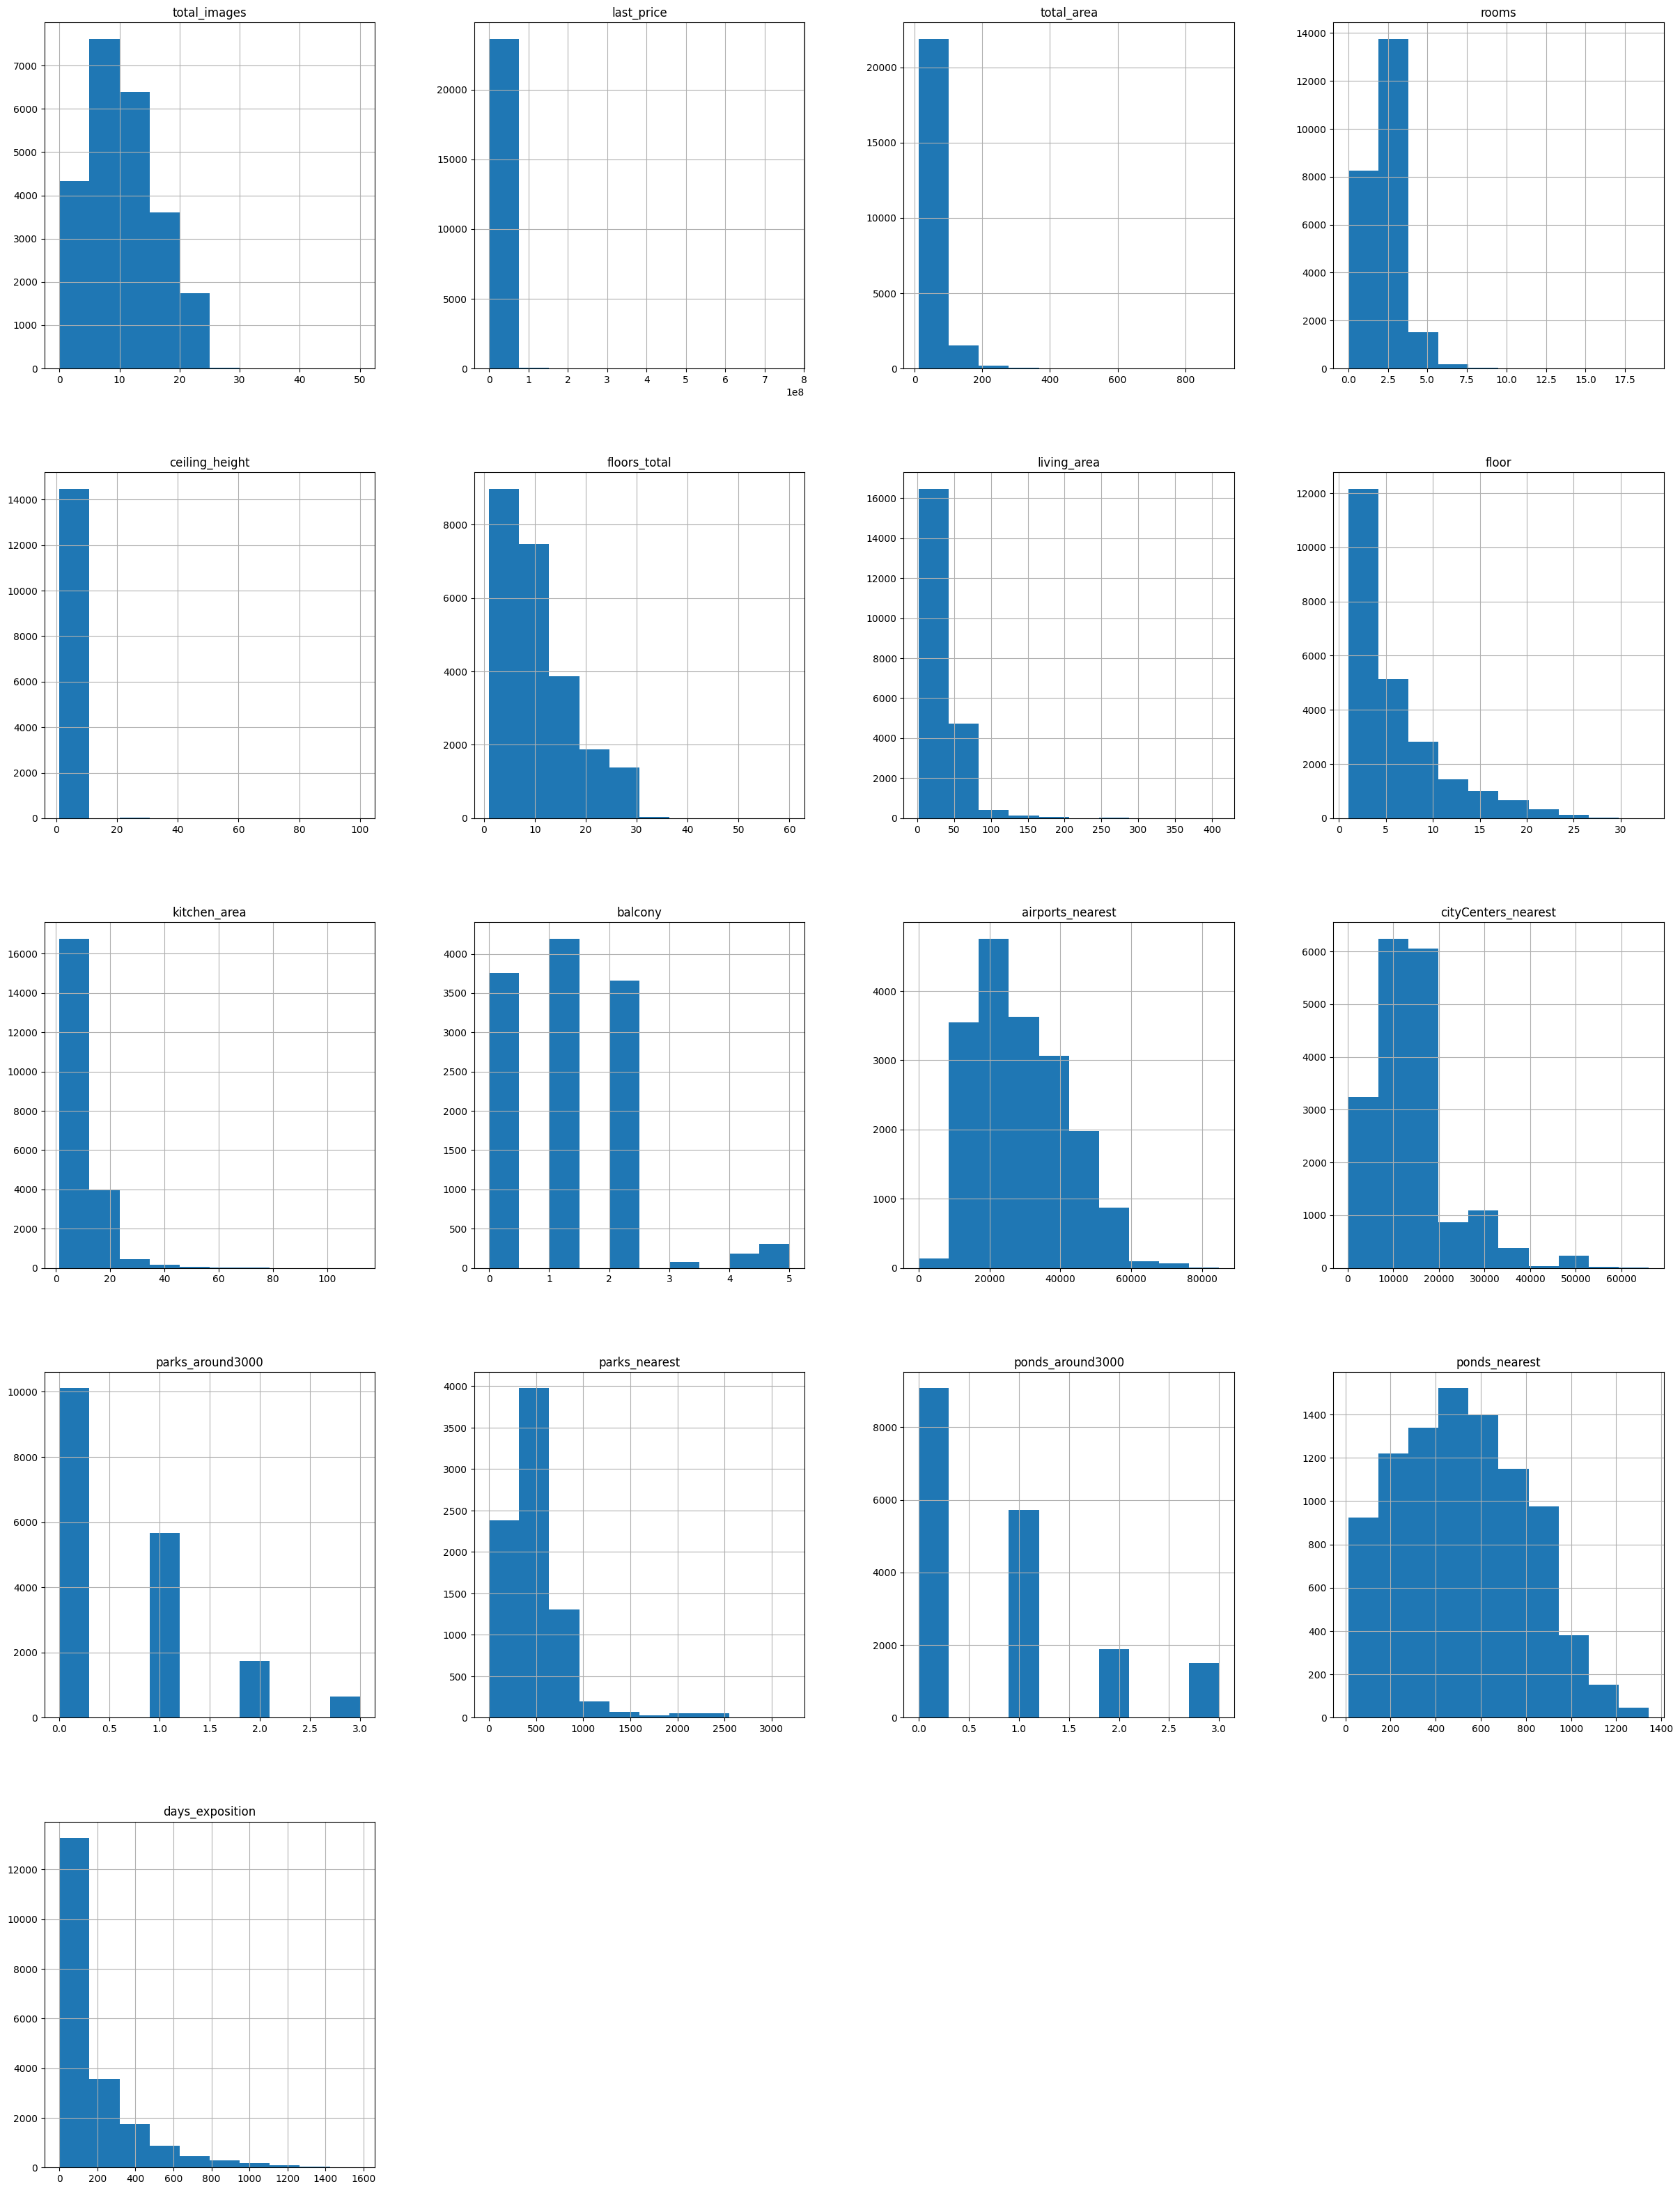

In [5]:
# Построим гистограмму для всех числовых столбцов таблицы, как это требует задание
df.hist(figsize=(30, 40))
plt.show()

In [6]:
# Ознакомимся с метриками описательной статистики
display(df.describe())

# а также посмотрим описание нечисловых значений таблицы
df.describe(include=['bool', 'object'])

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


,first_day_exposition,is_apartment,studio,open_plan,locality_name
count,23699,2775,23699,23699,23650
unique,1491,2,2,2,364
top,2018-02-01T00:00:00,False,False,False,Санкт-Петербург
freq,368,2725,23550,23632,15721


**Резюмируем особенности, выделим элементы, с которыми необходимо провести работу:**

* В нашей таблице 23699 строк и 22 столбца;


* Практически все столбцы нашей таблицы имеют нормальное имя, мы изменим только "cityCenters_nearest", "parks_around3000", "ponds_around3000";


* Не во всех столбцах на данный момент тип данных соответствует значению ячеек: в дальнейшей работе проведем корректировку;


* Во многих столбцах встречаются пропуски значений: попробуем исследовать причины их появления, устранить по-возможности и оформим баг-репорт;


* Необходимо обработать неявные дубликаты в столбце "locality_name";


* По метрикам описательной статистики можно обратить внимание на аномальные значения таких столбцов:

    - "total_area" - минимальное значение площади слишком маленькое.    
    
    - "ceiling_height" - высота потолков в 100 м вызывает подозрение в корректности. Как и высота 1 м.

    - "living_area" - минимальное значение жилой площади 2 кв.м.
    
    - "kitchen_area" - минимальная площадь кухни 1,3 кв.м.
    
    
    Это то, что можно увидеть по первичному ознакомлению.

**Далее изучим детально и обработаем каждый столбец таблицы.**

### Предобработка данных

**Производить предобраобтку будем от простого к сложному.** 

Наш план:
1. Приведем в порядок названия столбцов


2. Поменяем тип данных колонке "first_day_exposition". В остальных колонках поменяем после устранения пропусков.


3. Разберемся с неявными дубликатами в столбце "locality_name"


4. Обработаем пропуски в наших значениях, что сможем - заполним, иначе - избавимся от пропусков


5. Разберем выбросы в значениях, попробуем определить, с чем они связаны

#### Изменение названия столбцов

In [7]:
# Меняем названия в трех столбцах, изменяя изначальный датафрейм
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                  'parks_around3000': 'parks_around_3000',
                  'ponds_around3000': 'ponds_around_3000'}, inplace=True)

In [8]:
# Проверим успешность действия
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Изменение типа данных

В следующих столбцах меняем тип данных:

- **"first_day_exposition"** - приводим к datetime. Потому что это дата, так работать будет удобнее.


- **"floors_total", "balcony", "parks_around_3000", "ponds_around_3000", "days_exposition"** - приведем к int **после устранения пропусков**(т.к. NaN не даст поменять на int). Сделаем это, так как не может быть полтора балкона, этажа, пруда, парка. Количество дней публикации объявления также сделаем целым числом.

In [9]:
# переводим в datetime, оставляем только дату, так как нам интересен день публикации 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [10]:
# Проверяем, что вышло
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

#### Дубликаты в "locality_name"

Прежде чем удалять дубликаты, обратим внимание на пропуски в этом столбце.

**Возможная причина пропусков:**

* При публикации объявления пользователь не указал населенный пункт;
* Возникла проблема при выгрузке данных.

In [11]:
# Считаем процент пропущенных данных
df['locality_name'].isna().sum() / len(df['locality_name']) * 100

0.20675977889362418

Пропусков в этом столбце всего **0,2%**. Мы удалим эти строки.
Можно попробовать восстановить эти значения, зная информацию о расстоянии до аэропорта, количество парков и прудов в окрестности, сопоставив значения с известными данными. Но всё равно есть высокий риск ошибиться.

In [12]:
# Удаляем строки с пропусками в 'locality_name'
df = df[~df['locality_name'].isna()].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

In [13]:
# Ознакомимся с количеством уникальных значений столбца "locality_name"
df['locality_name'].nunique()

364

In [14]:
# Ознакомимся со списком уникальных значений столбца "locality_name"
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Какие проблемы замечены:**


* различное написание типа населенного пункта (*посёлок/поселок, городского типа/городской*)


* "посёлок при станции" и "посёлок при железнодорожной станции" - здесь также встречаются дубли


Исправим найденные проблемы. Для этого напишем функцию.

In [15]:
def change_name_poselok(x):
    '''
    Функция, при применении к ячейке нашей таблицы проверяет наличие в ее имени слов с различным
    написанием одних и тех же населенных пунктов и приводит значения к универсальному названию.
    '''
    
    names = str(x).split(' ')
    if "поселок" in names or "посёлок" in names:
        new_names = []
        for name in names:
            if name in ["поселок", "посёлок"]:
                new_names.append("посёлок")
            elif name in ["городского", "городской", "типа", "при", "железнодорожной"]:
                continue
            else:
                new_names.append(name)
        # возвращает новое значение
        return ' '.join(new_names)
    else:
        # или возвращает исходное значение
        return x
            

In [16]:
df['locality_name'] = df['locality_name'].apply(change_name_poselok)

In [17]:
# Ознакомимся с количеством уникальных значений столбца "locality_name"
df['locality_name'].nunique()

320

Было 364 уникальных значения, после изменения осталось 320.
Посмотрим на список уникальных значений.

In [18]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Обозначенные проблемы исправлены. Однако, при повторном анализе также были обнаружены такие неявные дубли:

* **"Кудрово" и "деревня Кудрово"**

    Как оказалось после изучения информации из свободных источников, город Кудрово ранее назывался деревней. Это один и тот же населенный пункт.
    
    
* **"Мурино" и "посёлок Мурино"**

    Также поискав информацию в интеренте, оказалось что район Мурино раньше был поселком. Отдельных таких населенных пунктов нет.

**Эти значения исправим далее вручную.**

In [19]:
# Меняем значения по новым проблемам
df['locality_name'] = df['locality_name'].apply(lambda x: "Мурино" if (x == "посёлок Мурино") else x)
df['locality_name'] = df['locality_name'].apply(lambda x: "Кудрово" if (x == "деревня Кудрово") else x)

In [20]:
df['locality_name'].nunique()

318

**Промежуточный вывод:**

Мы избавились от дубликатов в столбце "locality_name". Возникли сложности с типом населенных пунктов, а также с устаревшими названиями типов населенных пунктов. **Рекомендации по предупреждению** таких проблем в дальнейшем: по возможности сделать фиксированную форму выбора населенного пункта для публикации объявления, чтобы у пользователя отсутствовала возможность влиять на значение названия как типа населенного пункта, так и названия.

**Добавим проверку** на явные дубли

In [21]:
# Проверяем, нет ли задвоенных строк в таблице
df.duplicated().sum()

0

In [22]:
# Проверяем, нет ли пользователя, который опубликовал одну и ту же квартиру под разной стоимостью
# Для этого возьмем все колонки, но без цены
df.loc[:, ['total_images', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition']].duplicated().sum()

0

**Повторяющихся объектов в наших данных нет.**

#### Пропуски в значениях

Пропущенных значений в нашей таблице много. Вот список столбцов, над которыми нужно поработать:


* ```ceiling_heigh```
* ```floors_total```
* ```living_area```
* ```is_apartment```
* ```kitchen_area```
* ```balcony```
* ```airports_nearest```
* ```city_centers_nearest```
* ```parks_around_3000```
* ```parks_nearest```
* ```ponds_around_3000```
* ```ponds_nearest```
* ```days_exposition```

Данную задачу будем выполнять от простого к сложному.

Столбец **is_apartment**

**Возможная причина пропусков:**

* При публикации объявления пользователь не отметил нужный пункт;

In [23]:
# Считаем процент пропущенных данных
df['is_apartment'].isna().sum() / len(df['is_apartment']) * 100

88.32980972515855

Отсутствует 88% данных в столбце. 

Если данных нет, то скорее всего публикуемый объект не является апартаментами. Заполним значением ```False```

In [24]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Столбец **balcony**

**Возможная причина пропусков:**

* При отсутствии балкона пользователь не выбирает значение "0". 

In [25]:
# Считаем процент пропущенных данных
df['balcony'].isna().sum() / len(df['balcony']) * 100

48.680761099365746

48,7% пропусков. Логично предположить, что там, где значения пропущены, балконы отсутствуют. Мы заполним эти значения нулями.

In [26]:
# Заполняем нулями и сразу меняем тип данных в данном столбце на int
df['balcony'] = df['balcony'].fillna(0).astype(int)

Столбцы **living_area**, **kitchen_area**

**Возможная причина пропусков:**

* При публикации объявления пользователь не указал эти данные.

**План работы с этими столбцами**:

1. Посчитаем процент пропусков
---------
2. Уберем слишком низкие аномальные значения для жилой площади и площади кухни (в ```living_area``` были замечены аномальные значения. При большом значении общей площади попадаются значения жилой площади экстремально низкие (например, общая площадь - 139 кв.м, жилая - 8 кв.м.). Также сделаем и для ```kitchen_area```, но порог выберем другой.)
------
3. Заполним значения для квартир-студий. Пропущенные значения в "kitchen_area" заполним значением из "living_area", там где они есть (логика объясняется тем, что это кухня-гостинная: ноль поставить нельзя, так как это также и кухня.)
------
4. Заполнять оставшиеся пропуски медианой (для жилой площади и площади кухни соответственно) , предварительно разделив исходные объекты на группы по общей площади объектов.
------
5. **Важный шаг.** Проверим на появившиеся аномалии: если сумма заполненных пропусков площади кухни и жилой площади будет больше общей площади квартиры - удалим эти строки.

In [27]:
# Считаем процент пропущенных данных
display(df['living_area'].isna().sum() / len(df['living_area']) * 100)
df['kitchen_area'].isna().sum() / len(df['kitchen_area']) * 100

8.025369978858352

9.594080338266386

8% и 9,6% для жилой и кухонной площадей соответственно, не так много. Попробуем заполнить. Жилая площадь связана с площадью кухни и общей площадью квартиры. 


**Посмотрим, сколько аномальных значений для жилой площади**

За пороговые значения выберем квартиры с жилой площадью менее 12 кв.м при жилой площади большей 35 кв.м.

In [28]:
df.query('living_area < 12 and total_area > 35').sort_values(by='living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
13892,20,6350000.0,52.00,2018-02-06,2,3.0,6.0,2.00,2,False,...,9.00,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
23525,14,64990000.0,139.00,2015-11-24,3,3.0,8.0,3.00,8,False,...,16.00,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
3238,7,4440000.0,41.00,2017-07-02,1,NaN,17.0,3.00,17,False,...,11.00,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
21898,15,6100000.0,77.60,2019-02-28,4,2.5,9.0,5.40,1,False,...,9.80,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
20954,7,8900000.0,50.60,2018-10-22,2,2.5,7.0,8.00,3,False,...,31.00,0,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8213,14,5990000.0,43.50,2019-03-05,1,2.7,17.0,11.60,17,False,...,20.00,0,Санкт-Петербург,30139.0,11004.0,1.0,379.0,0.0,NaN,30.0
18155,6,3450000.0,38.60,2016-09-15,1,NaN,25.0,11.79,14,False,...,12.45,0,посёлок Парголово,52610.0,18787.0,0.0,NaN,0.0,NaN,435.0
19345,1,2583900.0,44.44,2017-10-19,1,NaN,3.0,11.88,1,False,...,6.37,0,Санкт-Петербург,39446.0,18500.0,0.0,NaN,2.0,639.0,14.0
3286,13,3400000.0,42.30,2017-01-24,1,2.7,20.0,11.90,3,False,...,21.90,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,14.0


In [29]:
# удаляем аномальные строки
df = df.query('~(living_area < 12 and total_area > 35)').reset_index(drop=True)

**Посмотрим, сколько аномальных значений для площади кухни**

За пороговые значения выберем квартиры с площадью кухни менее 5 кв.м при жилой площади большей 35 кв.м.

In [30]:
df.query('kitchen_area < 5 and total_area > 35').sort_values(by='kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
7913,3,5967734.0,66.40,2017-02-07,2,NaN,4.0,44.40,2,False,...,2.89,0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,NaN,335.0
3062,17,6000000.0,43.00,2018-11-12,2,2.90,4.0,29.30,2,False,...,3.20,0,Санкт-Петербург,22357.0,5247.0,1.0,319.0,2.0,831.0,37.0
14770,3,3900000.0,45.00,2018-02-01,2,3.00,1.0,28.40,1,False,...,3.30,0,посёлок Стрельна,26770.0,23654.0,0.0,NaN,2.0,640.0,196.0
12539,9,3700000.0,44.40,2017-09-20,2,2.50,5.0,28.40,5,False,...,3.40,1,Санкт-Петербург,41105.0,13609.0,0.0,NaN,0.0,NaN,15.0
14119,3,5200000.0,47.00,2017-08-24,2,3.30,4.0,36.00,3,False,...,3.50,0,Санкт-Петербург,23456.0,2998.0,0.0,NaN,0.0,NaN,237.0
12314,18,7575000.0,59.20,2017-07-21,2,NaN,23.0,32.60,22,False,...,3.50,2,Санкт-Петербург,15749.0,14545.0,0.0,NaN,0.0,NaN,228.0
23384,7,1600000.0,54.00,2016-12-26,2,2.30,1.0,33.00,1,False,...,3.50,0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,281.0
8669,6,14948000.0,42.70,2017-09-15,2,2.80,4.0,27.50,4,False,...,3.70,0,Санкт-Петербург,25212.0,3914.0,1.0,290.0,1.0,860.0,167.0
11422,14,2500000.0,40.80,2019-02-12,2,2.50,2.0,26.80,2,False,...,3.80,1,деревня Яльгелево,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17663,4,5000000.0,58.00,2017-09-11,3,NaN,9.0,38.00,1,False,...,4.00,5,Санкт-Петербург,50895.0,16223.0,0.0,NaN,0.0,NaN,8.0


In [31]:
# удаляем аномальные строки
df = df.query('~(kitchen_area < 5 and total_area > 35)').reset_index(drop=True)

In [32]:
# Для квартир-студий заполняем площадь кухни значениями из жилой площади
df.loc[df['studio'] == True, 'kitchen_area'] = df.loc[df['studio'] == True, 'living_area']

In [33]:
# Прежде чем сделать столбец с категориями квартир по общей площади, оценим, какие значения общей
# площади есть в нашей таблице
df.loc[:, ['living_area', 'kitchen_area', 'total_area', 'studio']][df['studio'] == False].describe()

,living_area,kitchen_area,total_area
count,21500.000000,21274.000000,23388.000000
mean,34.626752,10.560356,60.608443
std,22.079072,5.888312,35.732992
min,6.000000,1.300000,12.000000
25%,18.700000,7.000000,40.000000
50%,30.000000,9.100000,52.000000
75%,42.500000,12.000000,70.000000
max,409.700000,112.000000,900.000000


Как видно из таблицы значения общей площади квартир меняется от 12 кв.м. до 900 кв.м.

Разделим на группы, задав интервал.

In [34]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23532,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23533,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23534,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23535,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [35]:
# Это наши категории. Выделили 14 категорий
bins = pd.IntervalIndex.from_tuples([(0, 15),(15, 30), 
                                     (30, 45),(45,60),
                                     (60, 75),(75, 90),
                                     (90, 110),(110, 150),
                                     (150, 200),(200, 300),
                                     (300, 450),(450,600),
                                     (600,700),(700,900)])

df['category_total_area'] = pd.cut(df['total_area'], bins)

In [36]:
# Находим медианную жилую площадь и медианную площадь кухни по группам, 
# чтобы в дальнейшем заполнить NaN-значения
median_area_pivot = df.pivot_table(index='category_total_area',
                                   values=['living_area', 'kitchen_area'],
                                   aggfunc='median').reset_index().rename(columns={'living_area':'living_area_median',
                                                                                   'kitchen_area':'kitchen_area_median'})
median_area_pivot

,category_total_area,kitchen_area_median,living_area_median
0,"(0, 15]",2.000,10.000
1,"(15, 30]",6.500,16.200
2,"(30, 45]",8.400,18.000
3,"(45, 60]",8.200,30.600
4,"(60, 75]",10.000,41.000
5,"(75, 90]",12.000,48.000
6,"(90, 110]",14.000,57.000
7,"(110, 150]",16.450,74.000
8,"(150, 200]",19.475,99.155
9,"(200, 300]",25.000,149.400


In [37]:
# Добавим столбец с нашими медианными значениями в исходную таблицу
df = df.merge(median_area_pivot, how='left', on='category_total_area')

In [38]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,category_total_area,kitchen_area_median,living_area_median
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,"(90, 110]",14.000,57.000
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,"(30, 45]",8.400,18.000
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,"(45, 60]",8.200,30.600
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,"(150, 200]",19.475,99.155
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,"(90, 110]",14.000,57.000


In [39]:
# Заполним NaN-значения в колонках 'living_area' и 'kitchen_area'
df.loc[df['living_area'].isna(), 'living_area'] = df['living_area_median']
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['kitchen_area_median']


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23537 entries, 0 to 23536
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23537 non-null  int64         
 1   last_price            23537 non-null  float64       
 2   total_area            23537 non-null  float64       
 3   first_day_exposition  23537 non-null  datetime64[ns]
 4   rooms                 23537 non-null  int64         
 5   ceiling_height        14425 non-null  float64       
 6   floors_total          23454 non-null  float64       
 7   living_area           23537 non-null  float64       
 8   floor                 23537 non-null  int64         
 9   is_apartment          23537 non-null  bool          
 10  studio                23537 non-null  bool          
 11  open_plan             23537 non-null  bool          
 12  kitchen_area          23537 non-null  float64       
 13  balcony         

**Пропуски заполнились. Теперь посмотрим, сколько дополнительных аномалий нам это принесло**

In [41]:
df.query('(living_area + kitchen_area) > total_area and studio == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,category_total_area,kitchen_area_median,living_area_median
182,7,2600000.0,30.20,2018-02-14,1,2.65,9.0,26.10,5,False,...,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0,"(30, 45]",8.4,18.0
420,14,11500000.0,98.00,2016-05-10,3,2.65,3.0,88.00,3,False,...,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0,"(90, 110]",14.0,57.0
541,9,4700000.0,23.80,2018-12-28,1,NaN,18.0,20.00,9,False,...,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0,"(15, 30]",6.5,16.2
547,8,3100000.0,31.59,2018-03-08,1,2.70,19.0,30.55,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,70.0,"(30, 45]",8.4,18.0
597,12,5600000.0,53.70,2017-04-18,2,2.50,12.0,48.30,5,False,...,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0,"(45, 60]",8.2,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21947,6,2194000.0,36.50,2017-09-27,1,NaN,3.0,33.20,3,False,...,39446.0,18500.0,0.0,NaN,2.0,639.0,36.0,"(30, 45]",8.4,18.0
22207,6,2050000.0,17.20,2019-01-13,1,2.77,23.0,16.20,1,False,...,33645.0,13513.0,0.0,NaN,0.0,NaN,7.0,"(15, 30]",6.5,16.2
22527,4,2100000.0,23.60,2016-02-25,1,2.75,25.0,17.70,23,False,...,NaN,NaN,NaN,NaN,NaN,NaN,119.0,"(15, 30]",6.5,16.2
23036,3,1900000.0,18.90,2016-04-04,1,NaN,16.0,16.00,12,False,...,NaN,NaN,NaN,NaN,NaN,NaN,115.0,"(15, 30]",6.5,16.2


**148 строк**. Удалим эти строки, чтобы в дальнейшем они не повлияли на исследования.


In [42]:
df = df.query('~((living_area + kitchen_area) > total_area and studio == False)').reset_index(drop=True)

In [43]:
# Дропнем ненужные колонки
df.drop(['category_total_area', 'kitchen_area_median', 'living_area_median'], axis=1, inplace=True)

In [44]:
# Успешно обработали пропуски.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23389 entries, 0 to 23388
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23389 non-null  int64         
 1   last_price            23389 non-null  float64       
 2   total_area            23389 non-null  float64       
 3   first_day_exposition  23389 non-null  datetime64[ns]
 4   rooms                 23389 non-null  int64         
 5   ceiling_height        14357 non-null  float64       
 6   floors_total          23306 non-null  float64       
 7   living_area           23389 non-null  float64       
 8   floor                 23389 non-null  int64         
 9   is_apartment          23389 non-null  bool          
 10  studio                23389 non-null  bool          
 11  open_plan             23389 non-null  bool          
 12  kitchen_area          23389 non-null  float64       
 13  balcony         

Столбец **floors_total**

**Возможная причина пропусков:**

* При публикации объявления пользователь не указал количество этажей.

In [45]:
# Считаем процент пропущенных данных
df['floors_total'].isna().sum() / len(df['floors_total']) * 100

0.3548676728376587

Только 0.35% пропущенных данных.

Посмотрим, для каких значений в столбце 'floor' встречаются пропуски, возможно есть какая-либо связь.

In [46]:
df[df['floors_total'].isna()]['floor'].value_counts()


floor
4     9
6     9
8     7
12    6
9     5
5     4
3     4
21    4
1     3
19    3
11    3
13    3
18    3
7     3
15    3
10    3
24    2
2     2
20    2
14    2
22    1
17    1
23    1
Name: count, dtype: int64

Какой-то особой зависимости не наблюдается. 

Так как в последующем нам необходимо будет создавать категориальную переменную на основании этажности (первый, последний, другой) и рассматривать зависимости, мы удалим строки с пропущенными значениями.

Этих пропусков не так много, поэтому принимаем такое решение.

**Рекомендации по предупреждению** таких проблем в дальнейшем: сделать фиксированную форму выбора этажности объекта, в котором находится квартира.

In [47]:
# Удаляем строки с пропусками
df = df[~df['floors_total'].isna()].reset_index(drop=True)

In [48]:
# Изменим тип данных на int
df['floors_total'] = df['floors_total'].astype(int)

Столбец **ceiling_height**

**Возможная причина пропусков:**

* Возможно пункт при оформлении не является обязательным и при публикации пользователь не указал высоту потолков(не каждый знает высоту потолка, не каждый станет мерить)


In [49]:
# Считаем процент пропущенных данных
df['ceiling_height'].isna().sum() / len(df['ceiling_height']) * 100

38.436454131983176

38,5% пропусков. Цифра довольно большая. 

Заполним медианой сгруппированных значений по этажности дома. Это один из основополагающих факторов для высоты потолков в многоквартирных домах (по крайней мере из тех данных, которые доступны нам).


Но перед этим посмотрим на распределение наших данных, так как в первой части работы мы отметили, что в значениях этого столбца есть аномальные значения.



In [50]:
df['ceiling_height'].describe()

count    14348.000000
mean         2.768229
std          1.234139
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

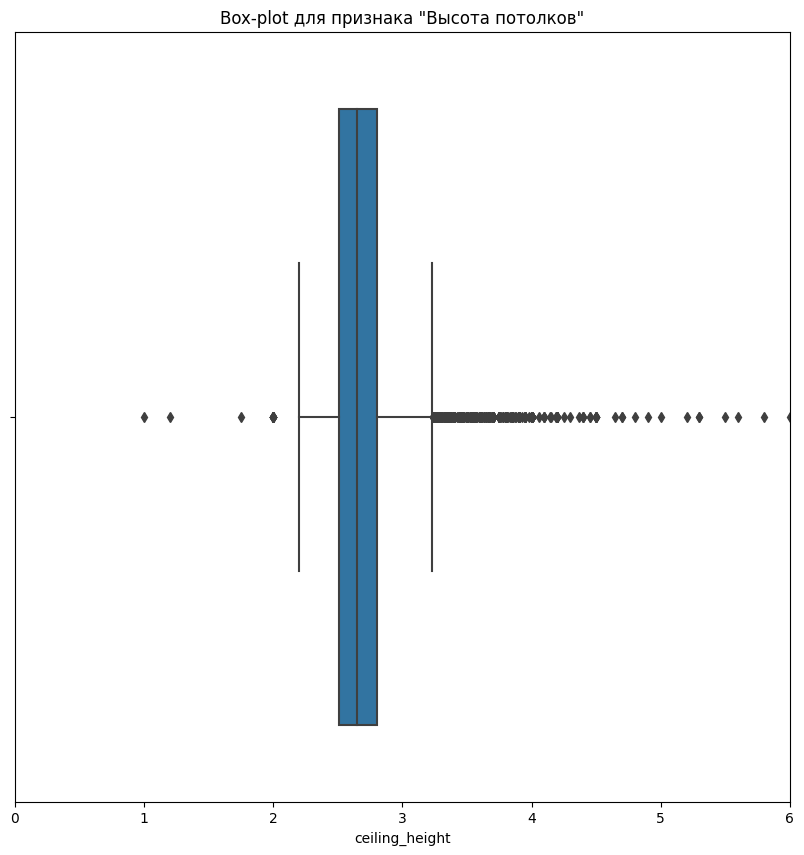

In [51]:
plt.figure(figsize=(10, 10))
plt.xlim(0, 6) 
plt.title('Box-plot для признака "Высота потолков"')
sns.boxplot(x=df["ceiling_height"]);

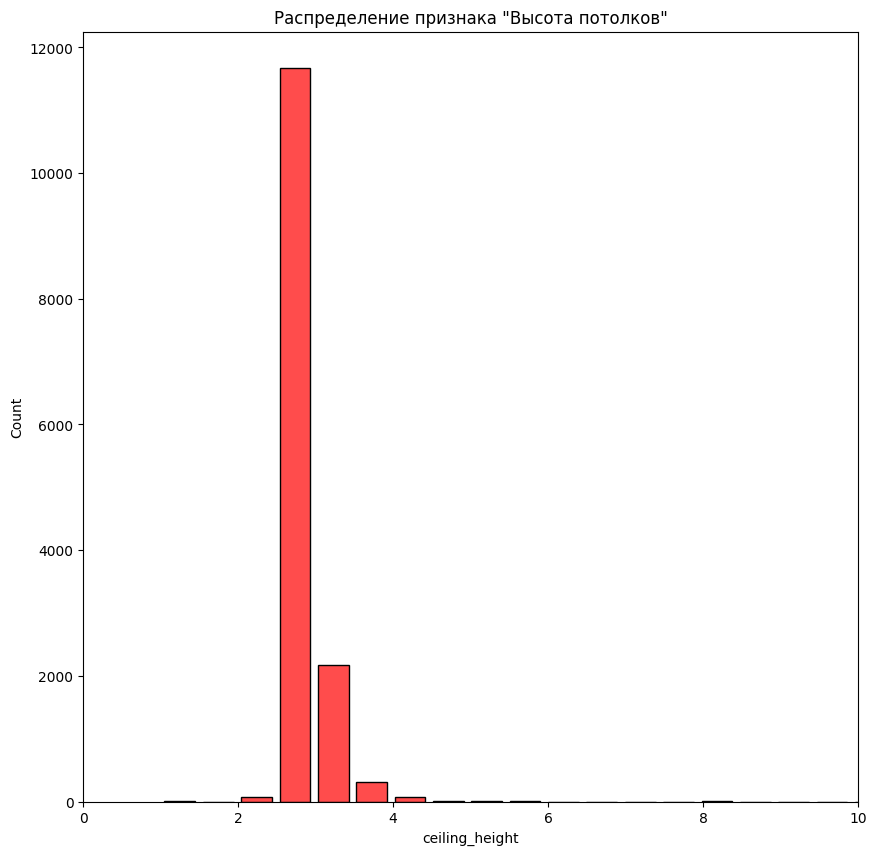

In [52]:
plt.figure(figsize=(10, 10))
plt.xlim(0, 10) 
plt.title('Распределение признака "Высота потолков"')
sns.histplot(df['ceiling_height'], color='red', alpha=0.7, bins=200, shrink=.8);

In [53]:
df['ceiling_height'].value_counts().head(15)

ceiling_height
2.50    3482
2.60    1635
2.70    1553
3.00    1097
2.55     976
2.80     974
2.75     897
2.65     668
3.20     272
3.10     202
2.90     163
3.30     140
2.56     139
3.50     129
2.57     103
Name: count, dtype: int64

Выбросы наблюдаются. Причем как в значения 1 м, так и 100 м. При этом как и предполагалось ранее, самые популярные значения колеблятся от 2,5 м до 3 м.

Обозначим максимальную высоту потолков в 6 м (все таки элитные квартиры тоже бывают). Минимальный порог высоты обозначим чуть ниже ГОСТа, на уровне 2-х метров. Всё, что не попадает в наши значения, будем считать за выбросы и удалим их.

In [54]:
df.query('ceiling_height < 2').shape

(3, 22)

In [55]:
df.query('ceiling_height > 6').shape

(27, 22)

In [56]:
df.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5617,5,1500000.0,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,5.20,0,посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16653,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22215,16,6000000.0,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [57]:
df.query('ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
349,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,8.2,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3089,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3410,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.3,2,False,...,7.3,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4561,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,...,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4792,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,...,6.5,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
4991,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5157,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5575,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,...,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5710,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5766,20,5650000.0,45.0,2018-08-15,1,8.3,16,19.3,14,False,...,8.3,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


**3 аномальных значения в минимальную сторону, 29 в максимальную**. Удалим эти строки.


Возможные причины аномальных значений в большую сторону - неправильно поставленный разделитель (пользователь имел в виду 3,2 метра, поставил 32,0). Для минимальных - опечатка.

In [58]:
# Удаляем строки с выбросами
df = df[~(df['ceiling_height'] < 2)&~(df['ceiling_height'] > 6)].reset_index(drop=True)

In [59]:
# Группируем данные по столбцу "floors_total" и находим медианные значения для высоты потолков
group_ceiling = df.groupby('floors_total')['ceiling_height'].median().to_frame().reset_index()
group_ceiling.columns = ['floors_total', 'median_ceiling_height']
group_ceiling

,floors_total,median_ceiling_height
0,1,2.80
1,2,2.70
2,3,2.80
3,4,3.00
4,5,2.55
5,6,3.00
6,7,3.00
7,8,2.80
8,9,2.55
9,10,2.60


In [60]:
# добавляем столбец с медианными значениями в исходную таблицу
df = df.merge(group_ceiling, how='left', on='floors_total')

In [61]:
# Заполняем пропуски медианными значениями
df['ceiling_height'].fillna(df['median_ceiling_height'], inplace=True)

In [62]:
# Удаляем лишнюю колонку
df = df.drop('median_ceiling_height', axis=1)

In [63]:
# Проверяем, всё ли вышло
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23276 entries, 0 to 23275
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23276 non-null  int64         
 1   last_price            23276 non-null  float64       
 2   total_area            23276 non-null  float64       
 3   first_day_exposition  23276 non-null  datetime64[ns]
 4   rooms                 23276 non-null  int64         
 5   ceiling_height        23275 non-null  float64       
 6   floors_total          23276 non-null  int64         
 7   living_area           23276 non-null  float64       
 8   floor                 23276 non-null  int64         
 9   is_apartment          23276 non-null  bool          
 10  studio                23276 non-null  bool          
 11  open_plan             23276 non-null  bool          
 12  kitchen_area          23276 non-null  float64       
 13  balcony         

Одно значение осталось пропущенным. Это связано с тем, что при группировке по количеству этажей группа для 33-го этажа не смогла получить значение. Заполним вручную, ближайшим.

In [64]:
df['ceiling_height'].fillna(2.65, inplace=True)

Столбцы **airports_nearest**, **city_centers_nearest**

По условию эти и последующие столбцы заполнялись автоматически на основе картографических данных. Соответственно, причиной пропусков могли стать проблемы автоматического расчета этих значений (при дальнейшем разборе, можно заметить, что автоматический расчет работает не для всех населенных пунктов)

In [65]:
# Считаем процент пропущенных данных
display(df['airports_nearest'].isna().sum() / len(df['airports_nearest']) * 100)
df['city_centers_nearest'].isna().sum() / len(df['city_centers_nearest']) * 100

23.30297301941914

23.204158790170133

**23,4% и 23,3%** пропусков для расстояния до аэропорта и до центра города соответственно.

Разобьем данные по населенным пунктам и заполним пропуски медианой для каждого населенного пункта.

In [66]:
pivot_air_center = df.pivot_table(index='locality_name', values=['airports_nearest',
                                                                 'city_centers_nearest'], 
                                  aggfunc='median').reset_index()
pivot_air_center.columns = ['locality_name', 'airports_nearest_median', 'city_centers_nearest_median']
pivot_air_center

,locality_name,airports_nearest_median,city_centers_nearest_median
0,Зеленогорск,72280.0,53379.0
1,Колпино,26232.0,32018.0
2,Красное Село,25723.5,29148.5
3,Кронштадт,67847.0,49572.5
4,Ломоносов,48425.0,51677.0
5,Павловск,20529.5,32683.0
6,Петергоф,39242.5,33771.0
7,Пушкин,15776.5,27941.0
8,Санкт-Петербург,26765.0,12239.0
9,Сестрорецк,56694.0,34821.0


Здесь обнаруживается проблема, что не для каждого населенного пункта есть информация о расстоянии до аэропорта.

Заполним только по имеющимся данным.

In [67]:
# добавляем столбцы с медианными значениями в исходную таблицу
df = df.merge(pivot_air_center, how='left', on='locality_name')

In [68]:
# Заполняем пропуски медианными значениями
df['airports_nearest'].fillna(df['airports_nearest_median'], inplace=True)
df['city_centers_nearest'].fillna(df['city_centers_nearest_median'], inplace=True)

In [69]:
# Удаляем лишние колонки
df = df.drop(['airports_nearest_median', 'city_centers_nearest_median'], axis=1)

In [70]:
# Проверяем, что вышло
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23276 entries, 0 to 23275
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23276 non-null  int64         
 1   last_price            23276 non-null  float64       
 2   total_area            23276 non-null  float64       
 3   first_day_exposition  23276 non-null  datetime64[ns]
 4   rooms                 23276 non-null  int64         
 5   ceiling_height        23276 non-null  float64       
 6   floors_total          23276 non-null  int64         
 7   living_area           23276 non-null  float64       
 8   floor                 23276 non-null  int64         
 9   is_apartment          23276 non-null  bool          
 10  studio                23276 non-null  bool          
 11  open_plan             23276 non-null  bool          
 12  kitchen_area          23276 non-null  float64       
 13  balcony         

Удалось восстановить только 92 значения.

Придется оставить пропуски в этих столбцах, так как удалить мы их не можем (слишком много значений), а заполнить их нечем.

Столбцы **parks_around_3000**, **parks_nearest**, **ponds_around_3000**, **ponds_nearest**

Также как и предыдущие значения, сформированы автоматически. Причиной пропусков могли стать проблемы автоматического расчета этих значений (при дальнейшем разборе, можно заметить, что автоматический расчет работает не для всех населенных пунктов)

In [71]:
# Считаем процент пропущенных данных
display(df['parks_around_3000'].isna().sum() / len(df['parks_around_3000']) * 100)
display(df['parks_nearest'].isna().sum() / len(df['parks_nearest']) * 100)
display(df['ponds_around_3000'].isna().sum() / len(df['ponds_around_3000']) * 100)
df['ponds_nearest'].isna().sum() / len(df['ponds_nearest']) * 100

23.19986251933322

65.82316549235264

23.19986251933322

61.591338717992784

Для столбцов "parks_around_3000" и "ponds_around_3000" пропущено **23,3%** Значений.

Со столбцами "parks_nearest" и "ponds_nearest" дела обстоят хуже - **65%** и **63%** соответственно. 

Попробуем как и впредыдущем шаге перекрыть эти сзначения медианой, сгруппировав по городу.

In [72]:
pivot_ponds_parks = df.pivot_table(index='locality_name', values=['parks_around_3000',
                                                                 'ponds_around_3000', 
                                                                 'parks_nearest',
                                                                 'ponds_nearest'], 
                                  aggfunc='median').reset_index()
pivot_ponds_parks.columns = ['locality_name', 
                             'parks_around_3000_median', 
                             'parks_nearest_median', 
                             'ponds_around_3000_median', 
                             'ponds_nearest_median']
pivot_ponds_parks

,locality_name,parks_around_3000_median,parks_nearest_median,ponds_around_3000_median,ponds_nearest_median
0,Зеленогорск,3.0,147.0,1.0,507.0
1,Колпино,0.0,393.0,1.0,509.0
2,Красное Село,0.0,435.0,0.0,225.5
3,Кронштадт,2.0,289.5,2.0,312.5
4,Ломоносов,0.0,407.0,1.0,553.0
5,Павловск,2.0,312.0,2.0,458.0
6,Петергоф,1.0,296.0,1.0,488.5
7,Пушкин,1.0,399.5,0.0,440.5
8,Санкт-Петербург,0.0,461.0,1.0,504.0
9,Сестрорецк,0.0,367.0,1.0,372.0


Как и в предыдущем шаге информация есть не для всех населенных пунктов.

Нет смысла заполнять NaN-значения в столбцах 'parks_nearest' и 'ponds_nearest' нулями, если в радиусе 3 км парков нет. Потому что 0 в этих данных будет обозначать, что парк находится рядом, а это может неправильно повлиять на дальнейшие исследования. Придется оставить пропущенные значения.

Заполним только пропуски для столбцов 'parks_around_3000_median' и 'ponds_around_3000_median' медианными значениями по городу, сколько получится.

In [73]:
# добавляем столбцы с медианными значениями в исходную таблицу
df = df.merge(pivot_ponds_parks, how='left', on='locality_name')

# Заполняем пропуски медианными значениями
df['parks_around_3000'].fillna(df['parks_around_3000_median'], inplace=True)
df['ponds_around_3000'].fillna(df['ponds_around_3000_median'], inplace=True)

# Удаляем лишние колонки
df = df.drop(['parks_around_3000_median', 
              'parks_nearest_median', 
              'ponds_around_3000_median', 
              'ponds_nearest_median'], axis=1)

In [74]:
# Проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23276 entries, 0 to 23275
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23276 non-null  int64         
 1   last_price            23276 non-null  float64       
 2   total_area            23276 non-null  float64       
 3   first_day_exposition  23276 non-null  datetime64[ns]
 4   rooms                 23276 non-null  int64         
 5   ceiling_height        23276 non-null  float64       
 6   floors_total          23276 non-null  int64         
 7   living_area           23276 non-null  float64       
 8   floor                 23276 non-null  int64         
 9   is_apartment          23276 non-null  bool          
 10  studio                23276 non-null  bool          
 11  open_plan             23276 non-null  bool          
 12  kitchen_area          23276 non-null  float64       
 13  balcony         

Удалось заполнить только 68 пропущенных значений. Остальные пропуски придется оставить.

Столбец **days_exposition**

**Возможная причина пропусков:**

* Объявление на момент выгрузки еще опубликовано.

In [75]:
# Считаем процент пропущенных данных
df['days_exposition'].isna().sum() / len(df['days_exposition']) * 100

13.485994157071662

**13,4%** много, чтобы удалять. Попробуем понять, откуда возникли пропуски.

In [76]:
# Посмотрим, в какие года выложены объявления, по которым пропуски
df[df['days_exposition'].isna()]['first_day_exposition'].dt.year.unique()

array([2019, 2018, 2017, 2014, 2016, 2015], dtype=int32)

In [77]:
# Посмотрим на максимальное значение
df['days_exposition'].describe()

count    20137.000000
mean       181.020956
std        220.058286
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Первое предположение, почему отсутствуют значения в столбце 'days_exposition' - квартира еще не продалась, объявление опубликовано (на момент выгрузки данных). Судя по максимальным значениям в этой колонке, бывают квартиры, которые продаются в течение 4 - 5 лет.

Заполнять эти пропуски не будем, однако в рекомендациях следует указать, что было бы неплохо вести отдельную колонку "Опубликовано/Снято".

#### Аномальные значения

Мы провели работу со значениями "ceiling_height": убрали слишком маленькие значения, и очень большие.

Посмотрим, где еще в наших данных могут встречаться выбросы. Для этого сравним средние значения наших столбцов с их медианным значением.

In [78]:
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23276.000000,2.327600e+04,23276.000000,23276,23276.000000,23276.000000,23276.000000,23276.000000,23276.000000,23276.000000,23276.000000,17943.000000,17943.000000,17943.000000,7955.000000,17943.000000,8940.000000,20137.000000
mean,9.889070,6.555222e+06,60.514117,2017-11-10 05:52:19.714727680,2.076774,2.707522,10.659091,34.624175,5.867761,10.506398,0.592026,28781.148972,14188.115170,0.609709,490.402514,0.769381,518.161633,181.020956
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.550000,5.000000,18.400000,2.000000,7.200000,0.000000,18590.500000,9258.500000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.300000,4.000000,9.000000,0.000000,26765.000000,13065.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.800000e+06,70.000000,2018-08-26 00:00:00,3.000000,2.750000,16.000000,42.100000,8.000000,12.000000,1.000000,37227.000000,16271.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,6.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.683033,1.092127e+07,35.753223,NaN,1.078683,0.235289,6.570016,22.405514,4.859853,5.740549,0.959455,12589.439873,8603.727901,0.801146,340.040315,0.936381,277.702817,220.058286


При первичном ознакомлении можно выделить такие столбцы, как:


* ```total_area``` - также как и в случае с ценой, такие ,большие квартиры бывают


* ```rooms``` - 19 комнат для квартиры в 380 кв. м. тоже реальная цифра. Однако, мы можем обратить внимание на значение 0 комнат. Оказалось, значение ноль также нормально, если квартира является студией или в квартире открытая планировка (согласно определению из словаря, это «пространство без перегородок или с их небольшим количеством»)


* ```airports_nearest``` - расстояние до аэропорта из Зеленогорска действительно больше 70 км. Может вызвать вопрос минимальное значение (0 метров). Однако, напомним, что эти данные получены автоматически и данный объект может вполне находиться в районе стадиона "Пулково", а там ЖК граничит с территорией аэропорта.


* ```days_exposition``` - про данный столбец я уже упоминал в предыдущем шаге: вполне реально что квартиры продаются как длительное, так и короткое время.



* ```living_area``` - были замечены аномальные значения. При большом значении общей площади попадались значения жилой площади экстремально низкие (например, общая площадь - 139 кв.м, жилая - 8 кв.м.) Мы удалили их при обработке пропусков.


* ```last_price``` - максимальное значение в этом столбце 763 миллиона. Следующее по убыванию значение уже в районе 400 миллионов. При этом такая цена на квартиру - вполне реальная цифра. Удалять это значение не совсем верно. Однако есть минимальное значение 12190, явно такой цены не может быть. Удалим.




In [79]:
df = df.query('last_price != 12190').reset_index(drop=True)

**Выводы по предобработке данных.** 


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23275 entries, 0 to 23274
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23275 non-null  int64         
 1   last_price            23275 non-null  float64       
 2   total_area            23275 non-null  float64       
 3   first_day_exposition  23275 non-null  datetime64[ns]
 4   rooms                 23275 non-null  int64         
 5   ceiling_height        23275 non-null  float64       
 6   floors_total          23275 non-null  int64         
 7   living_area           23275 non-null  float64       
 8   floor                 23275 non-null  int64         
 9   is_apartment          23275 non-null  bool          
 10  studio                23275 non-null  bool          
 11  open_plan             23275 non-null  bool          
 12  kitchen_area          23275 non-null  float64       
 13  balcony         

**Какая работа проделана:**


1. Изменили названия столбцов ```city_centers_nearest```, ```parks_around_3000```, ```ponds_around_3000```.
    

2. Изменили тип данных в колонках ```first_day_exposition```, ```floors_total```, ```balcony```. Не удалось изменить тип данных в ```airports_nearest```, ```city_centers_nearest```, ```parks_around_3000```, ```parks_nearest```, ```ponds_around_3000```, ```ponds_nearest```, ```days_exposition```, потому что в них не удалось избавиться от всех пропусков.


3. Удалили неявные дубликаты в столбце ```locality_name```.


4. Обработали пропуски в большей части таблицы. Удалено менее 1% строк от изначальной таблицы. Пропуски остались в столбцах, которые заполнялись автоматически, на основе картографических данных. А также остались пропуски в ```days_exposition```, которые скорее всего связаны с тем, что объявление еще опубликовано.


5. Удалили аномальные значения высоты потолков, жилой площади и площади кухни.

**Комментарии по сбору данных:**


    
    
    
    
    

* При выборе населенного пункта необходимо доработать выпадающий список населенных пунктов, чтобы пользователи выбирали населенный пункт из предоставленных сайтом;


* Сделать обязательным поле "Сколько всего этажей в доме?"


* При выборе высоты потолка необходимо доработать выпадающий список высоты, чтобы пользователи выбирали вариант из предоставленных сайтом;


* Значительно доработать автоматический сбор информации по расстояниям до центра, аэропорта, парков и прудов;


* Сделать доступной информацию о статусе публикации объявления на момент выгрузки (опубликовано/снято).

### Посчитайте и добавьте в таблицу новые столбцы

Добавим следующие столбцы:


* ```price_per_square``` - цена за 1 кв.м


* ```weekday_public``` - день недели публикации


* ```month_public``` - месяц публикации


* ```year_public``` - год публикации


* ```type_floor``` - тип этажа


* ```km_city_centers_nearest``` - расстояние до центра в километрах

In [81]:
df['price_per_square'] = df['last_price'] / df['total_area']

In [82]:
df['weekday_public'] = df['first_day_exposition'].dt.weekday

In [83]:
df['month_public'] = df['first_day_exposition'].dt.month

In [84]:
df['year_public'] = df['first_day_exposition'].dt.year

In [85]:
def set_type_floor(row):
    
    '''Функция возвращает тип этажа тип этажа (первый/последний/другой).'''
    
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'



In [86]:
df['type_floor'] = df.apply(set_type_floor, axis=1)

In [87]:
# создаем столбец и округляем полученные значения
df['km_city_centers_nearest'] = (df['city_centers_nearest'] / 1000).apply(lambda x: '{0:.0f}'.format(x))

In [88]:
# Проверим, удалось ли добавить все необходимое
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square,weekday_public,month_public,year_public,type_floor,km_city_centers_nearest
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,99.155,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8


**Промежуточный вывод:** 


Все запрашиваемые заданием столбцы добавлены. В столбце ```km_city_centers_nearest``` встречаются пропуски, так как нам не удалось убрать все пропуски в ```city_centers_nearest```.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23275 entries, 0 to 23274
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23275 non-null  int64         
 1   last_price               23275 non-null  float64       
 2   total_area               23275 non-null  float64       
 3   first_day_exposition     23275 non-null  datetime64[ns]
 4   rooms                    23275 non-null  int64         
 5   ceiling_height           23275 non-null  float64       
 6   floors_total             23275 non-null  int64         
 7   living_area              23275 non-null  float64       
 8   floor                    23275 non-null  int64         
 9   is_apartment             23275 non-null  bool          
 10  studio                   23275 non-null  bool          
 11  open_plan                23275 non-null  bool          
 12  kitchen_area             23275 n

### Проведите исследовательский анализ данных

**Наш план:** 



1. Изучим параметры объектов, построим гистограммы и опишем наблюдения;


2. Изучим, как быстро продавались квартиры;


3. Изучим факторы, которые больше всего влияют на стоимость объекта;


4. Посчитаем среднюю цену 1 кв.м в ТОП-10 населенных пунктов по количеству объявлений. Выделим населенный пункт с самой дорогой и с самой дешевой стоимостью. 


5. Посчитаем среднюю стоимость километра в показателе ```km_city_centers_nearest``` для г. Санкт-Петербург. Опишем, как стоимость зависит от расстояния до центра.

 #### Изучим параметры объектов

**Общая площадь**

In [90]:
df['total_area'].describe()

count    23275.000000
mean        60.512034
std         35.752578
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

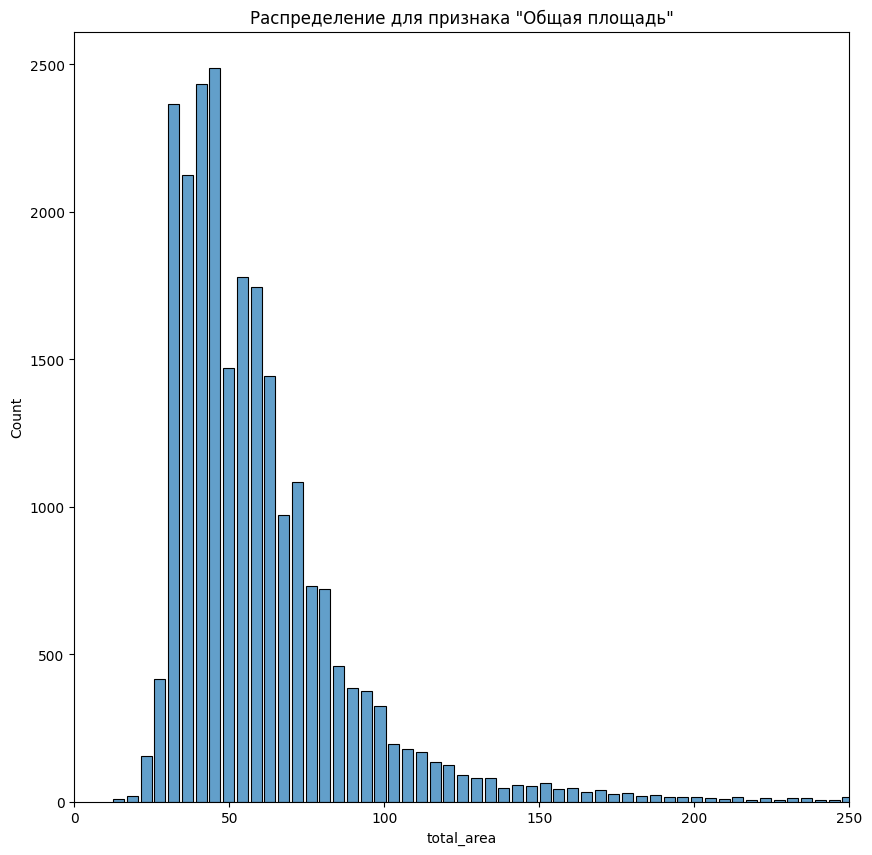

In [91]:
# Для общей площади
plt.figure(figsize=(10, 10))
plt.xlim(0, 250) 
plt.title('Распределение для признака "Общая площадь"')
sns.histplot(df['total_area'], alpha=0.7, bins=200, shrink=.8);

**Наблюдения:**
Самые распространенное значение общей площади составляют 45 кв.м.

При этом минимальное значение 12 кв.м. Наблюдается несколько пиков на гистограмме: 31 кв.м, 42 кв.м., 45 кв.м.

Далее спад, и опять пик на 60 кв.м. Это связано по всей видимости с тем, что больше распространены небольшие квартиры, студии, 1-комнатные, 2-х комнатные.

**Жилая площадь**

In [92]:
df['living_area'].describe()

count    23275.000000
mean        34.624287
std         22.405989
min          2.000000
25%         18.400000
50%         30.300000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

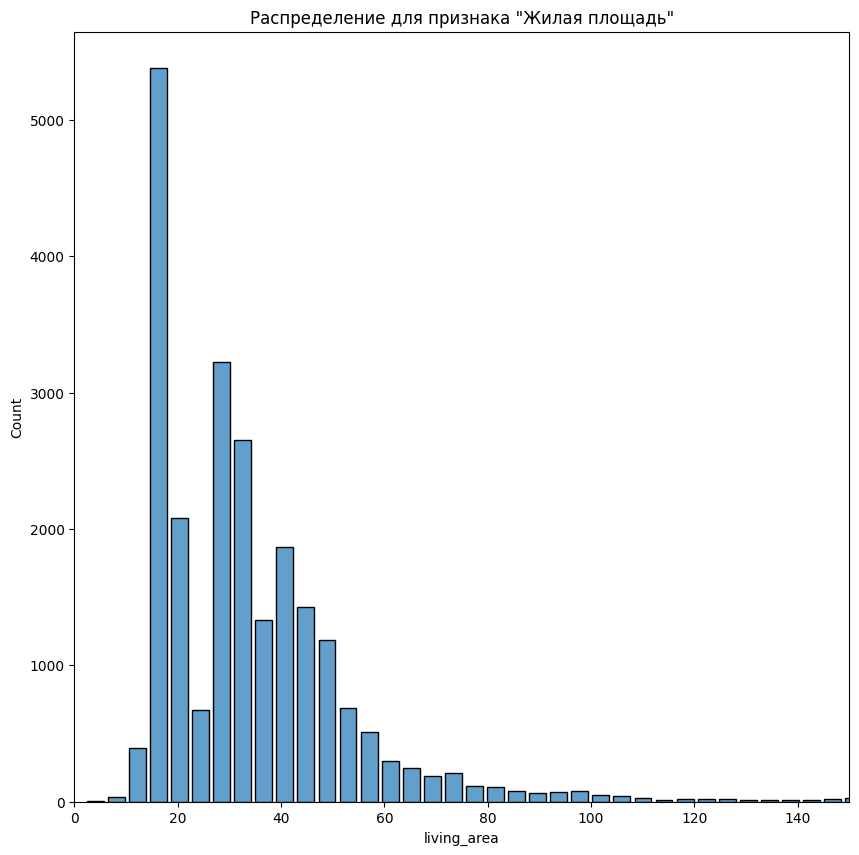

In [93]:
# Для жилой площади
plt.figure(figsize=(10, 10))
plt.xlim(0, 150) 
plt.title('Распределение для признака "Жилая площадь"')
sns.histplot(df['living_area'], alpha=0.7, bins=100, shrink=.8);

**Наблюдения:**
Самые распространенное значение жилой площади составляют 18 кв.м.

Далее пик происходит на 30 кв.м., за ним спад и небольшой подъем на 41 кв.м.

Скорее всего такая динамика также связана типом квартир, по количеству комнат.

**Площадь кухни**

In [94]:
df['kitchen_area'].describe()

count    23275.000000
mean        10.505109
std          5.737304
min          1.300000
25%          7.200000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

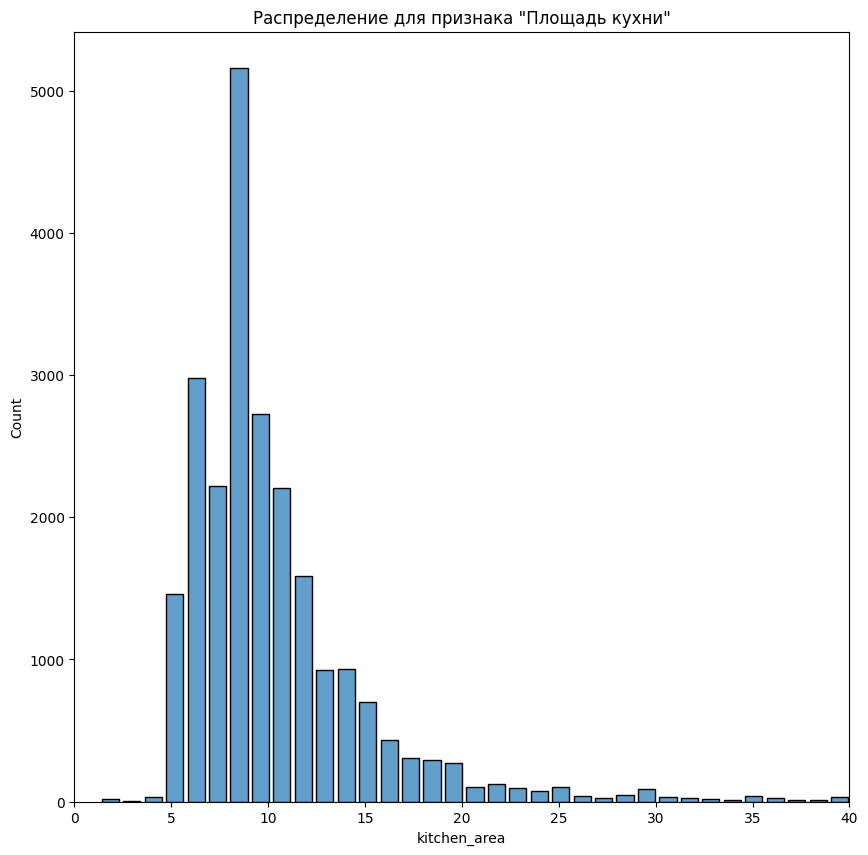

In [95]:
# Для площади кухни
plt.figure(figsize=(10, 10))
plt.xlim(0, 40) 
plt.title('Распределение для признака "Площадь кухни"')
sns.histplot(df['kitchen_area'], alpha=0.7, bins=100, shrink=.8);

**Наблюдения:**
Самые распространенное значение общей площади составляют от 6 до 10 кв.м.

Далее пик происходит на 10 кв.м.

Скорее всего такая динамика также связана типом квартир, по общей площади.

**Цена объекта**

In [96]:
df['last_price'].describe()

count    2.327500e+04
mean     6.555504e+06
std      1.092142e+07
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

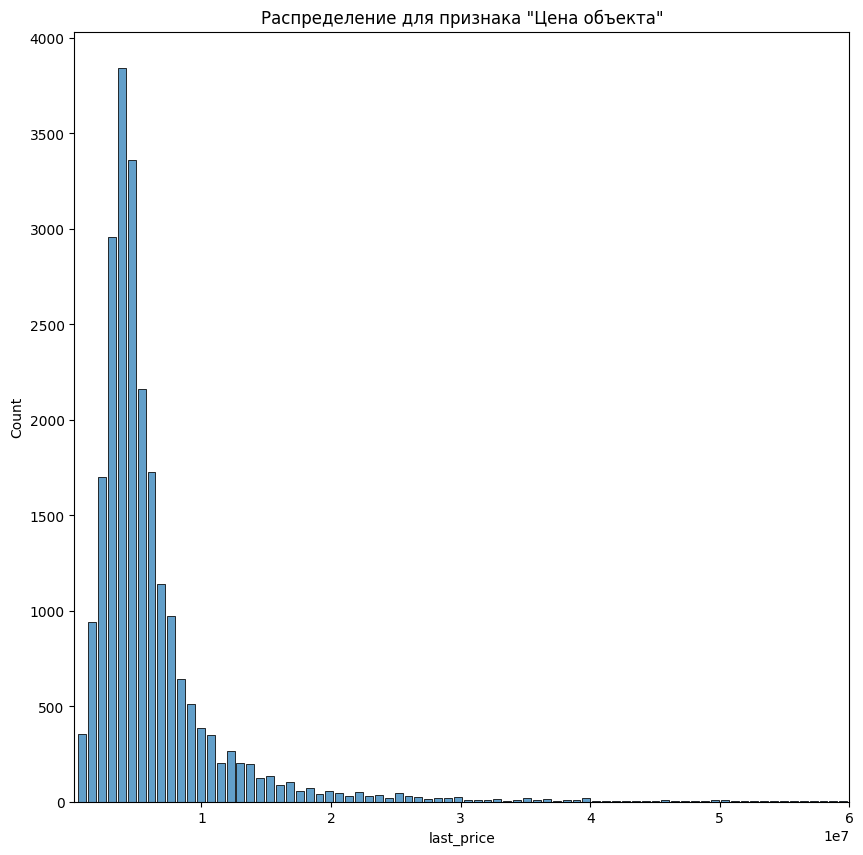

In [97]:
# Для цены объекта
plt.figure(figsize=(10, 10))
plt.xlim(200000, 60000000) 
plt.title('Распределение для признака "Цена объекта"')
sns.histplot(df['last_price'], alpha=0.7, bins=1000, shrink=.8);

**Наблюдения:**
Чаще всего встречается цена 4,5 млн. рублей. При этом максимальная цена в наших данных 763 млн.

Медиана - 4,69 млн. Но большие значения портят среднее - 6,6 млн.

**Количество комнат**

In [98]:
df['rooms'].describe()

count    23275.000000
mean         2.076778
std          1.078706
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

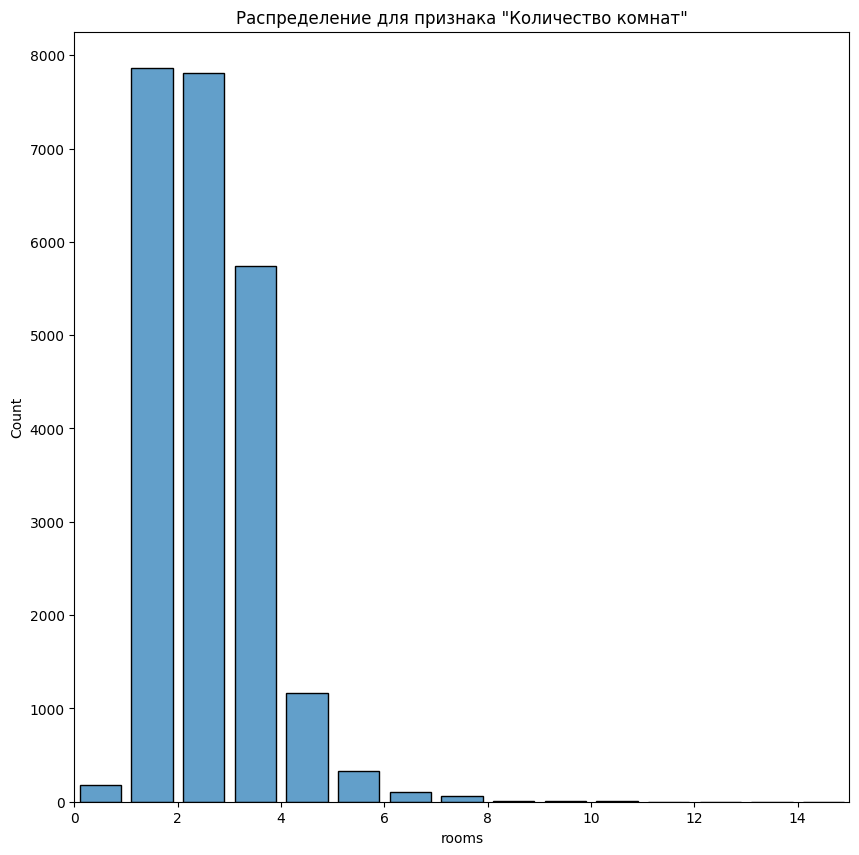

In [99]:
# Для количества комнат
plt.figure(figsize=(10, 10))
plt.xlim(0, 15) 
plt.title('Распределение для признака "Количество комнат"')
sns.histplot(df['rooms'], alpha=0.7, bins=19, shrink=.8);

**Наблюдения:**
Значения "0" - для квартир-студий. 

Большинство 2-комнатных квартир, с небольшим отрывом в меньшую сторону - квартиры с 1 комнатой.

3 комнаты - меньше на треть, 4-комнаты - в 7 раз ниже двушек и однушек. Дальше уже эксклюзив.

**Высота потолков**

In [100]:
df['ceiling_height'].describe()

count    23275.000000
mean         2.707520
std          0.235294
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          6.000000
Name: ceiling_height, dtype: float64

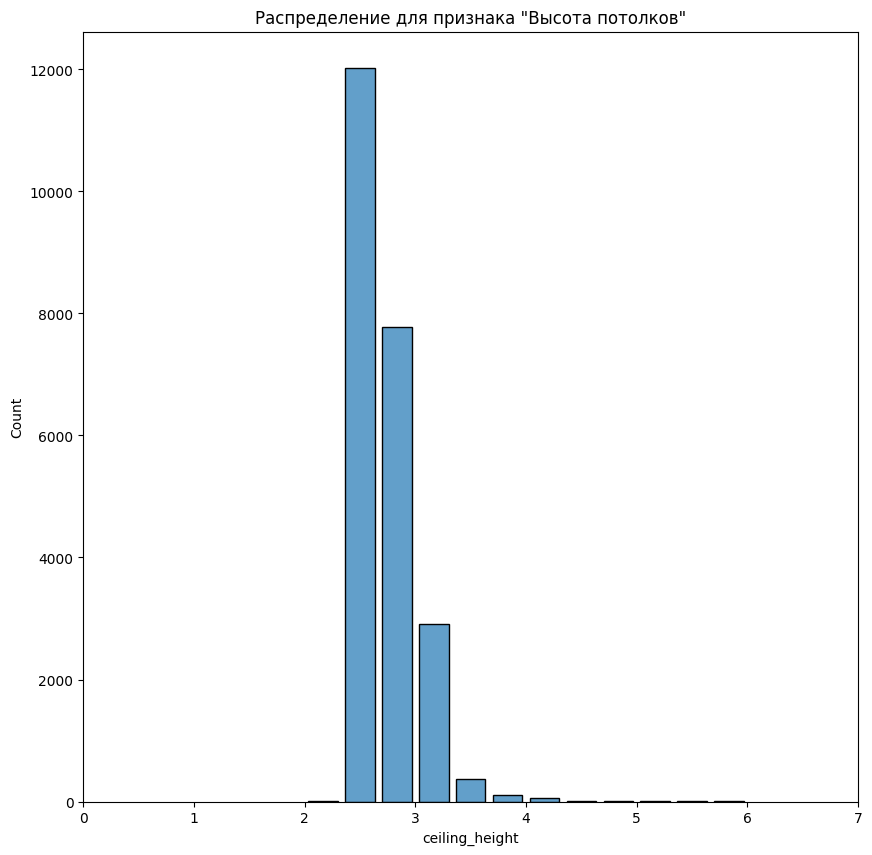

In [101]:
# Для высоты потолков
plt.figure(figsize=(10, 10))
plt.xlim(0, 7) 
plt.title('Распределение для признака "Высота потолков"')
sns.histplot(df['ceiling_height'], alpha=0.7, bins=12, shrink=.8);

**Наблюдения:**
Чаще всего встречается высота 2,55 м.

Однако потолки в 3 м тоже встречаются часто, что связано с архитектурой Санкт-Петербурга.

**Этаж квартиры**

In [102]:
df['floor'].describe()

count    23275.000000
mean         5.866939
std          4.858339
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

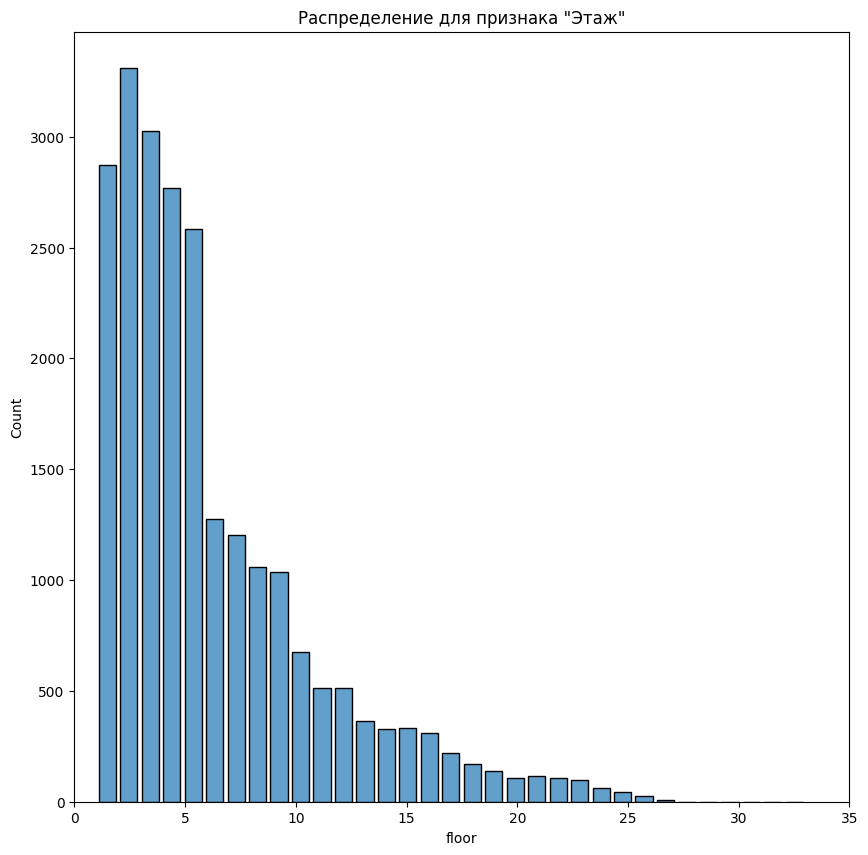

In [103]:
# Для этажа
plt.figure(figsize=(10, 10))
plt.xlim(0, 35) 
plt.title('Распределение для признака "Этаж"')
sns.histplot(df['floor'], alpha=0.7, bins=33, shrink=.8);

**Наблюдения:**
С первого по пятый - самые распространённые этажи. Из них чаще всего встречается второй.

Предположу, что это также связано с архитектурой города, много старых зданий. А многоэтажки относятся уже к более современному строительству.

**Тип этажа квартиры**

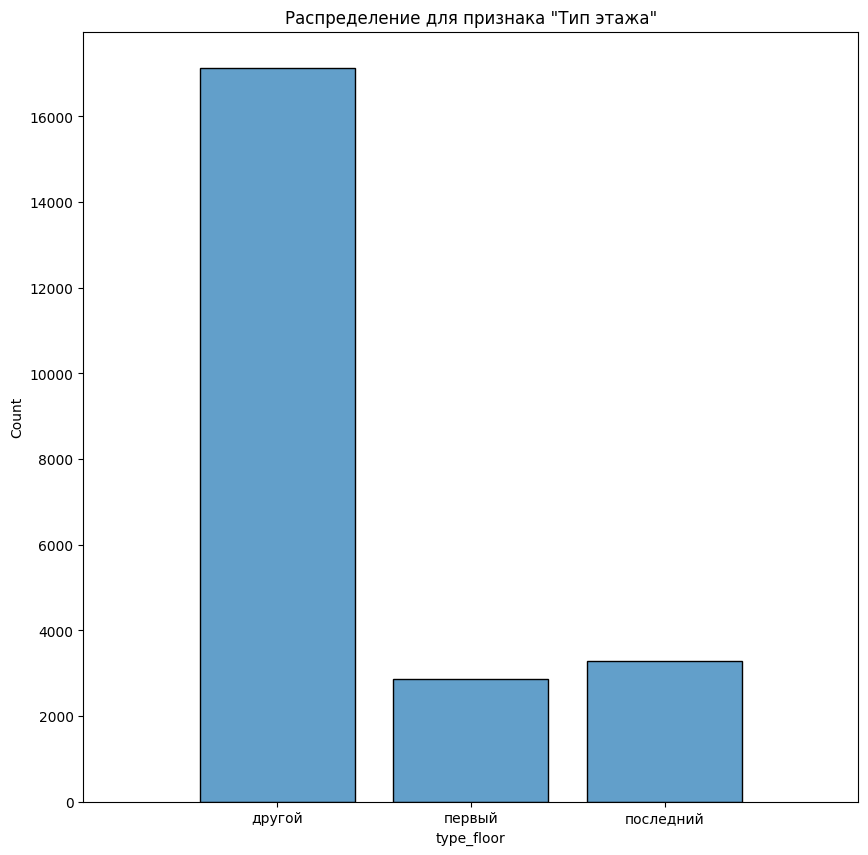

In [104]:
# Для типа этажа
plt.figure(figsize=(10, 10))
plt.xlim(-1, 3) 
plt.title('Распределение для признака "Тип этажа"')
sns.histplot(df['type_floor'], alpha=0.7, bins=3, shrink=.8);

**Наблюдения:**
Чаще всего продаются не крайние этажи.

При этом квартиры на последнем этаже продаются больше, чем на первом.

В наши дни на первых этажах много коммерческой недвижимости, возможно есть связь с этим.

**Общее количество этажей в доме**

In [105]:
df['floors_total'].describe()

count    23275.000000
mean        10.658475
std          6.569484
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

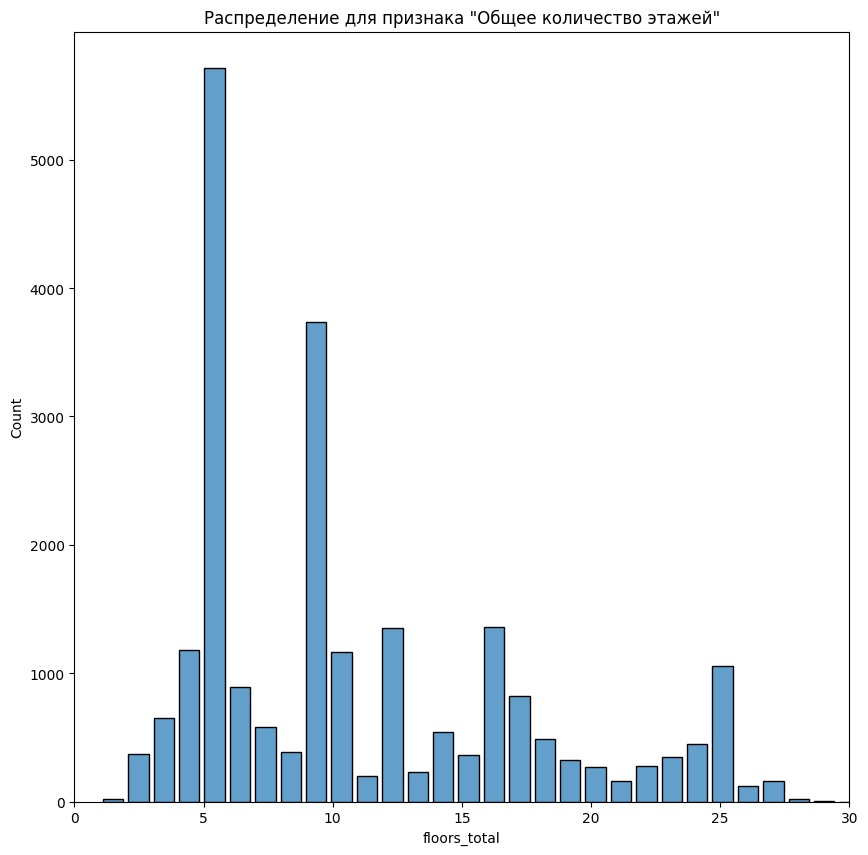

In [106]:
# Для общего количества этажей
plt.figure(figsize=(10, 10))
plt.xlim(0, 30) 
plt.title('Распределение для признака "Общее количество этажей"')
sns.histplot(df['floors_total'], alpha=0.7, bins=60, shrink=.8);

**Наблюдения:**
Больше всего квартир продают в пятиэтажных домах. 

Вторые по распространенности - девятиэтажные.

**Расстояние до центра города в метрах**

In [107]:
df['city_centers_nearest'].describe()

count    17942.000000
mean     14188.394521
std       8603.886301
min        181.000000
25%       9261.250000
50%      13065.500000
75%      16271.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

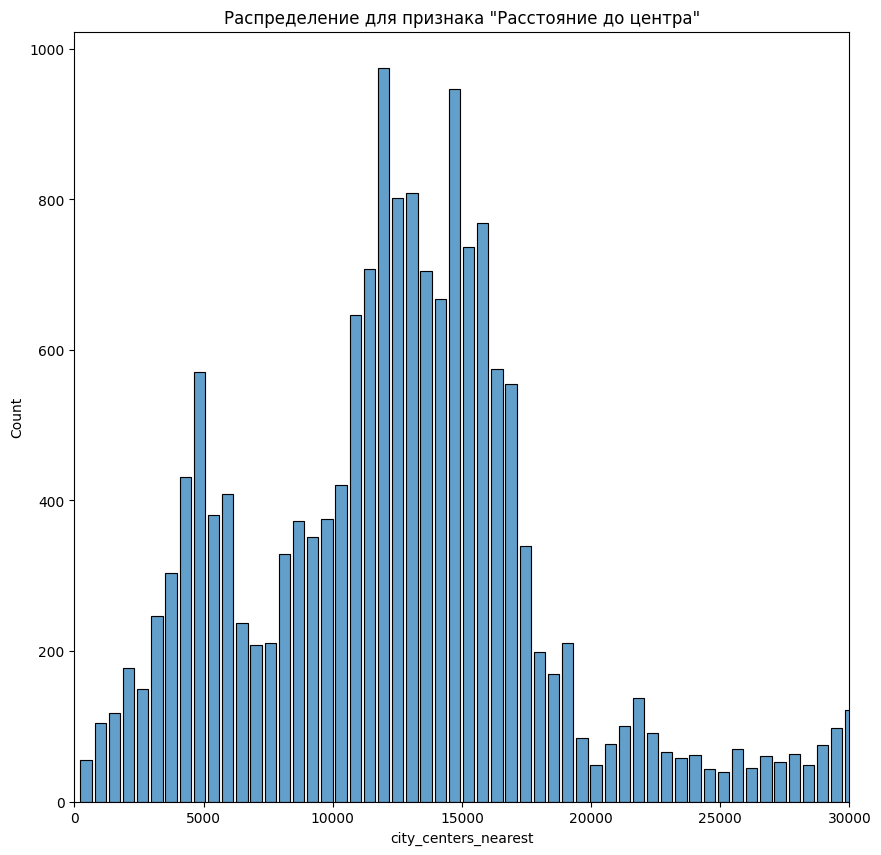

In [108]:
# Для расстояния до центра
plt.figure(figsize=(10, 10))
plt.xlim(0, 30000) 
plt.title('Распределение для признака "Расстояние до центра"')
sns.histplot(df['city_centers_nearest'], alpha=0.7, bins=120, shrink=.8);

**Наблюдения:**
Выделяются три пиковых значения: около 5 км от центра, около 12 км и около 15 км. 

Далее 19 км от центра публикаций значительно меньше.

**Расстояние до ближайшего аэропорта**

In [109]:
df['airports_nearest'].describe()

count    17942.000000
mean     28780.723164
std      12589.661513
min          0.000000
25%      18590.250000
50%      26765.000000
75%      37227.000000
max      84869.000000
Name: airports_nearest, dtype: float64

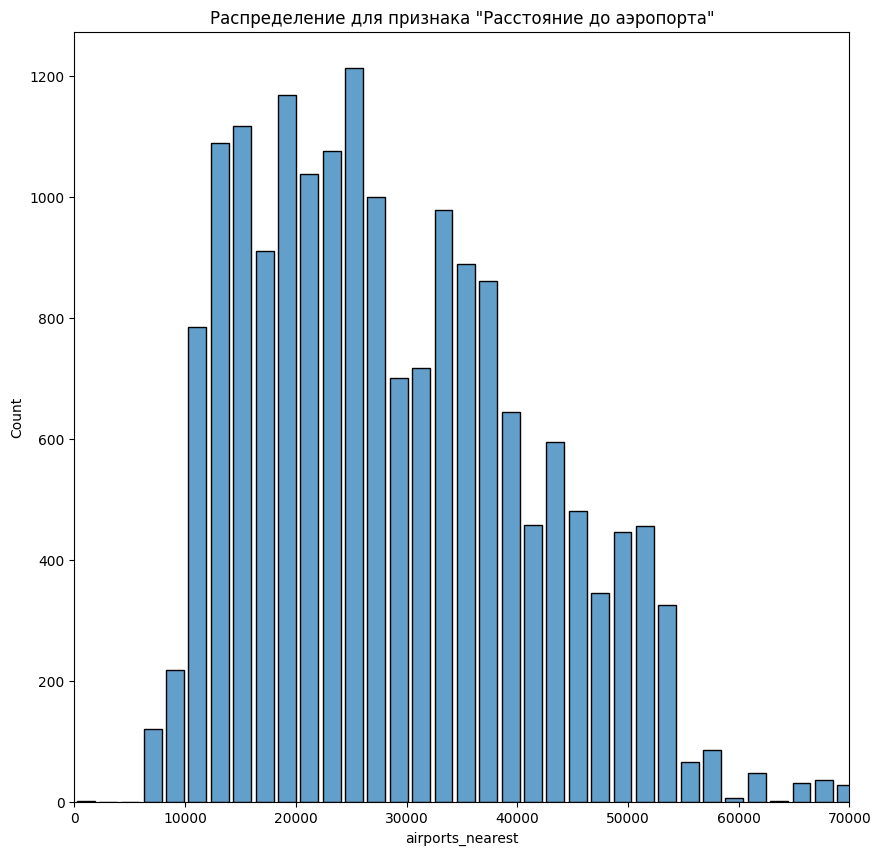

In [110]:
# Для расстояния до аэропорта
plt.figure(figsize=(10, 10))
plt.xlim(0, 70000) 
plt.title('Распределение для признака "Расстояние до аэропорта"')
sns.histplot(df['airports_nearest'], alpha=0.7, bins=42, shrink=.8);

**Наблюдения:**
Есть несколько пиковых значений от 12 до 22 км до аэропорта, и от 32 до 37 км.

Скорее всего это связано с конкретным населенным пунктом, где размещаются объявления. И в каких-то пунктах объявлений больше.

**Расстояние до ближайшего парка**

In [111]:
df['parks_nearest'].describe()

count    7954.000000
mean      490.362962
std       340.043392
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

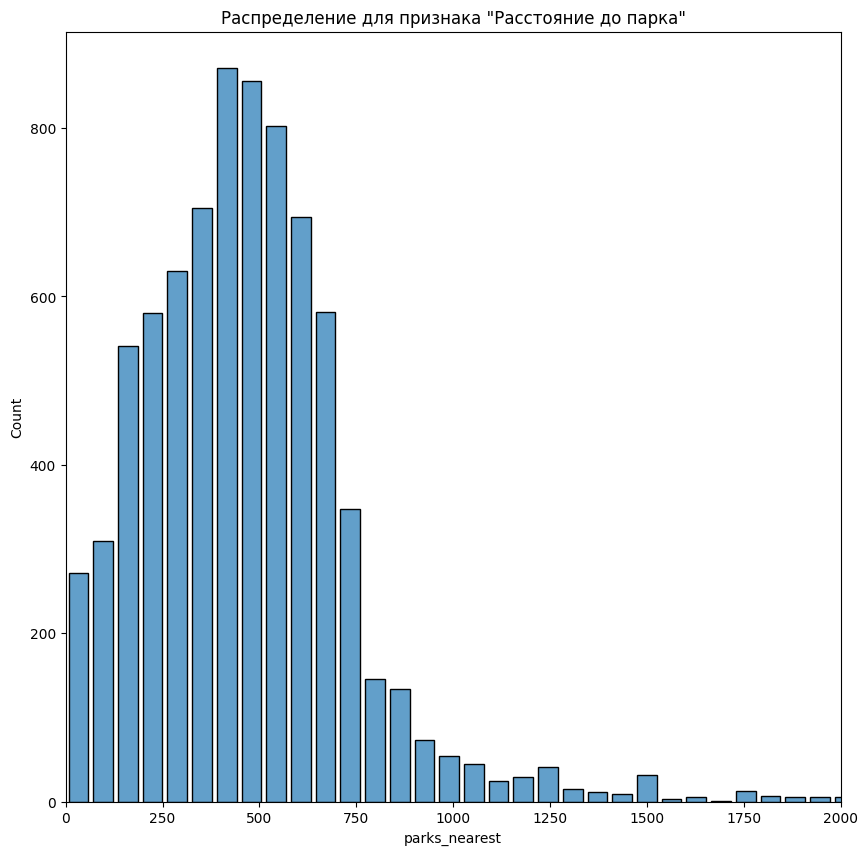

In [112]:
# Для расстояния до парка
plt.figure(figsize=(10, 10))
plt.xlim(0, 2000) 
plt.title('Распределение для признака "Расстояние до парка"')
sns.histplot(df['parks_nearest'], alpha=0.7, bins=50, shrink=.8);

**Наблюдения:**
Пик от 450 до 600 метров до парка.

Опять же, скорее всего влияние геолокации: в каком-то районе больше публикаций.

То есть, если в Санкт-Петербурге больше всего квартир со средним расстоянием до парка 450-600 метров, то мы и увидем это на графике. Большой город - больше объявлений с расстоянием до парка 450-600 метров.

Это как пример.

**День публикации объявления**

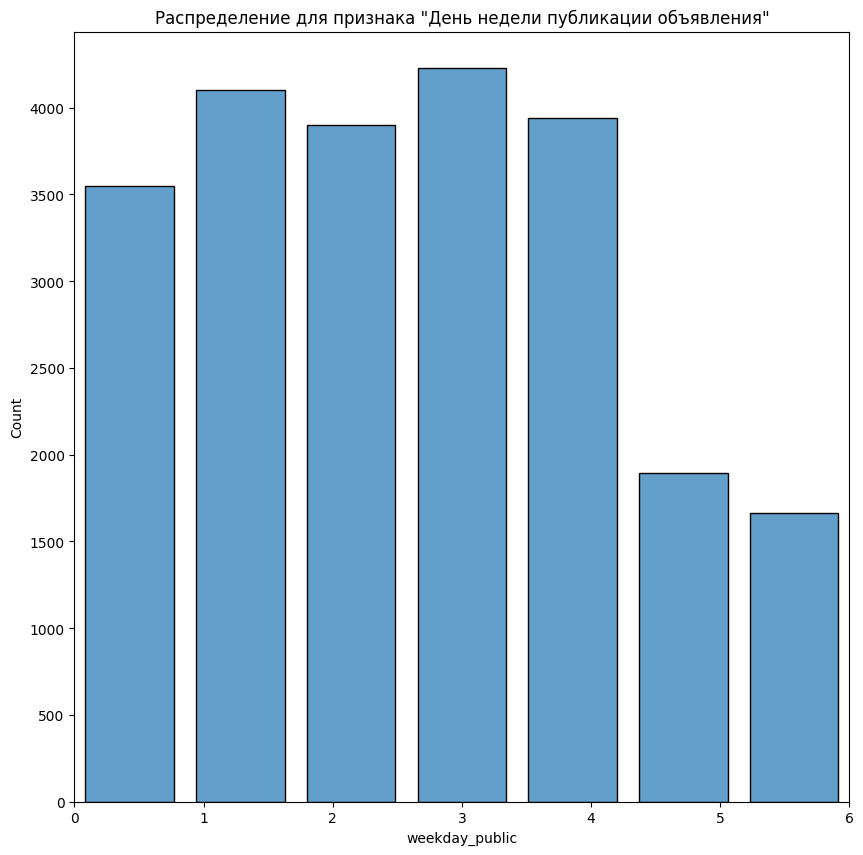

In [113]:
# Для дня публикации
plt.figure(figsize=(10, 10))
plt.xlim(0, 6) 
plt.title('Распределение для признака "День недели публикации объявления"')
sns.histplot(df['weekday_public'], alpha=0.7, bins=7, shrink=.8);

**Наблюдения:**
Меньше всего публикуют объявления в выходные дни.

Вторник и четверг - самые загруженные.

**Месяц публикации объявления**

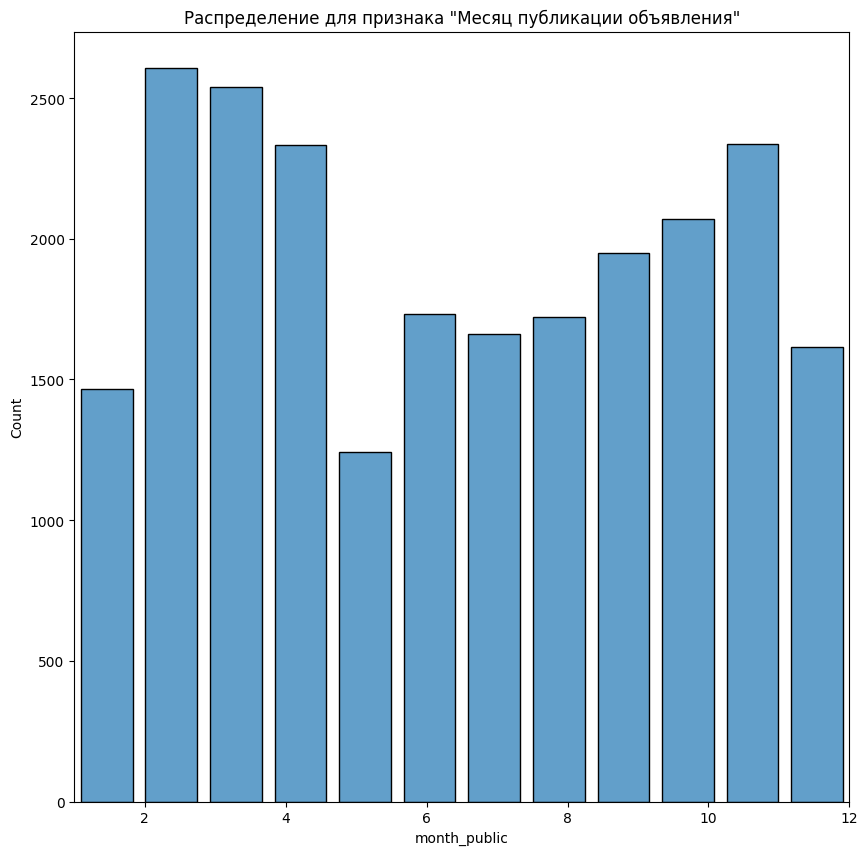

In [114]:
# Для месяца публикации
plt.figure(figsize=(10, 10))
plt.xlim(1, 12) 
plt.title('Распределение для признака "Месяц публикации объявления"')
sns.histplot(df['month_public'], alpha=0.7, bins=12, shrink=.8);

**Наблюдения:**
Есть пик по публикации объявлений - февраль, март, апрель.

Далее тендеция роста к ноябрю, в декабре опять спад. Там не до продаж, там праздники впереди.

 #### Скорость продажи квартир

In [115]:
df['days_exposition'].describe()

count    20136.000000
mean       181.029549
std        220.060372
min          1.000000
25%         45.000000
50%         95.000000
75%        231.250000
max       1580.000000
Name: days_exposition, dtype: float64

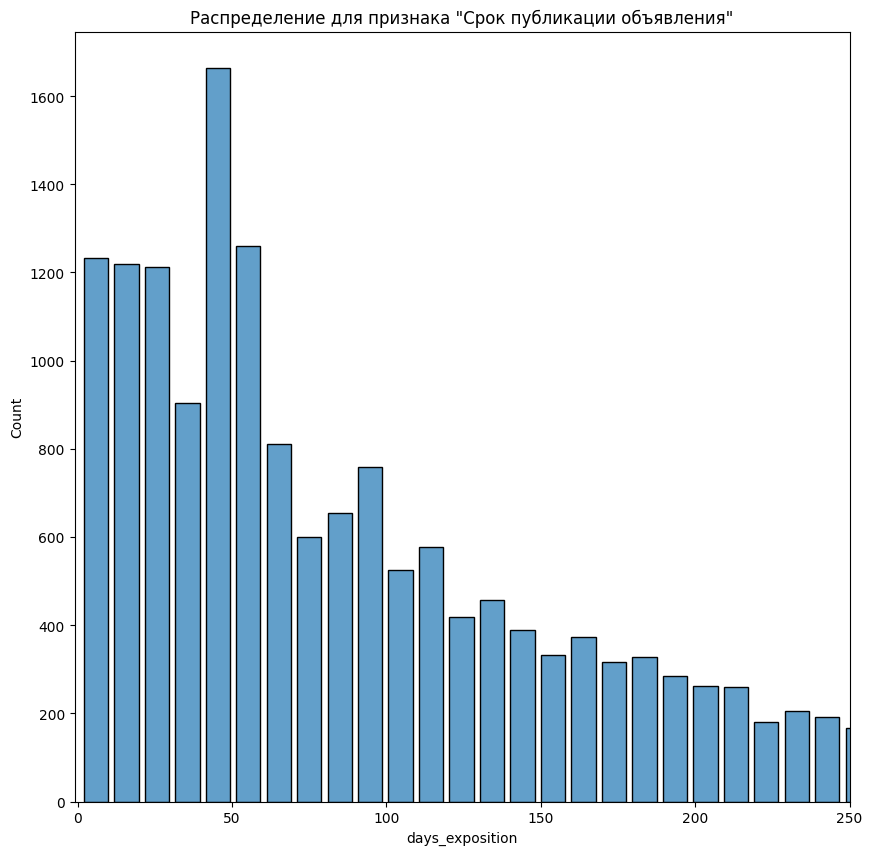

In [116]:
plt.figure(figsize=(10, 10))
plt.xlim(-1, 250) 
plt.title('Распределение для признака "Срок публикации объявления"')
sns.histplot(df['days_exposition'], alpha=0.7, bins=160, shrink=.8);

**Наблюдения:**


Cамое распространённое количество дней публикации объявления - ```45```.


25% опубликованных квартир продалось не более чем за 45 дней.


При этом **среднее** время публикации - ```182 дня```, а **медиана** - ```97 дней```.

По моим наблюдениям, к быстрым продажам можно отнести квартиры, проданные за неделю. Но это вопрос относительности. Однако можно заметить, как меняется количество проданных объектов от количества дней:

* 2 дня и меньше - 3 объявления


* 3 дня и меньше - 158 объявлений


* 5 дней и меньше - 474 объявления


* 7 дней и меньше - 822 объявления

К необычно долгим можно отнести те объявления, которые опубликованы более 1000 дней. Таких в нашей таблице 271 объявление.

#### Факторы, влияющие на стоимость объекта

Для начала оценим, как цена коррелирует с другими количественными показателями в нашей таблице

In [117]:
df.loc[:, ['last_price','total_area',
           'living_area','kitchen_area',
           'rooms','weekday_public',
           'month_public','year_public']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,weekday_public,month_public,year_public
last_price,1.000000,0.653849,0.585405,0.477628,0.361915,0.001961,0.001739,-0.042530
total_area,0.653849,1.000000,0.945727,0.614206,0.758391,-0.004981,0.005099,-0.079447
living_area,0.585405,0.945727,1.000000,0.458493,0.830360,-0.004852,0.000417,-0.072349
kitchen_area,0.477628,0.614206,0.458493,1.000000,0.275820,-0.006174,0.004797,-0.058297
rooms,0.361915,0.758391,0.830360,0.275820,1.000000,-0.004772,-0.003793,-0.054483
weekday_public,0.001961,-0.004981,-0.004852,-0.006174,-0.004772,1.000000,0.011400,-0.002539
month_public,0.001739,0.005099,0.000417,0.004797,-0.003793,0.011400,1.000000,-0.271052
year_public,-0.042530,-0.079447,-0.072349,-0.058297,-0.054483,-0.002539,-0.271052,1.000000


**Промежуточный вывод:**

Можно сказать сразу, без построения графиков, что из количественных переменных четкая корреляция прослеживается только с общей площадью, и менее четкая с жилой площадью. Посмотрим эти зависимости на графиках.

Зависимость от **общей площади**

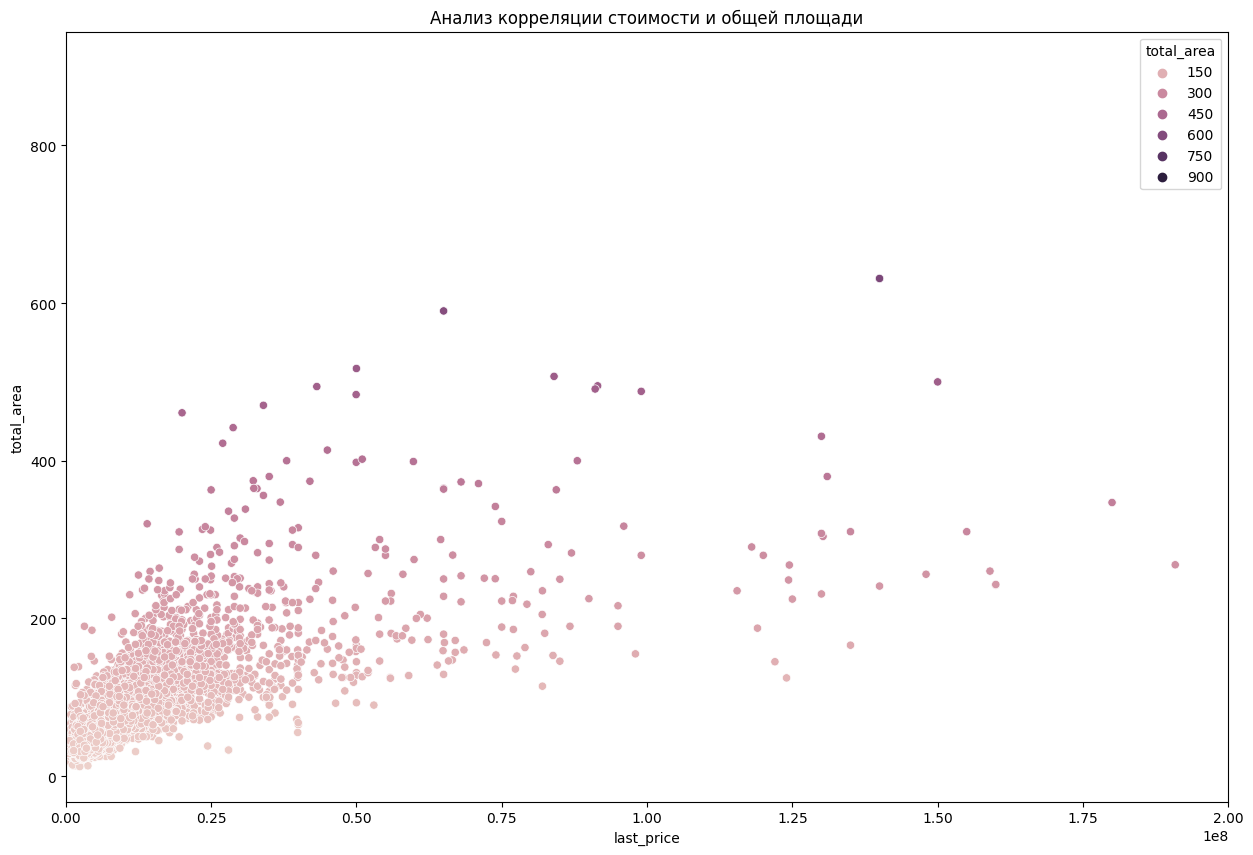

In [118]:
plt.figure(figsize=(15, 10))
plt.xlim(0, 200000000) 
plt.title('Анализ корреляции стоимости и общей площади')
sns.scatterplot(data=df, x="last_price", y="total_area", hue="total_area");

**Наблюдения:**


Прослеживается положительная связь цены и общей площади.

Зависимость от **Жилой площади**

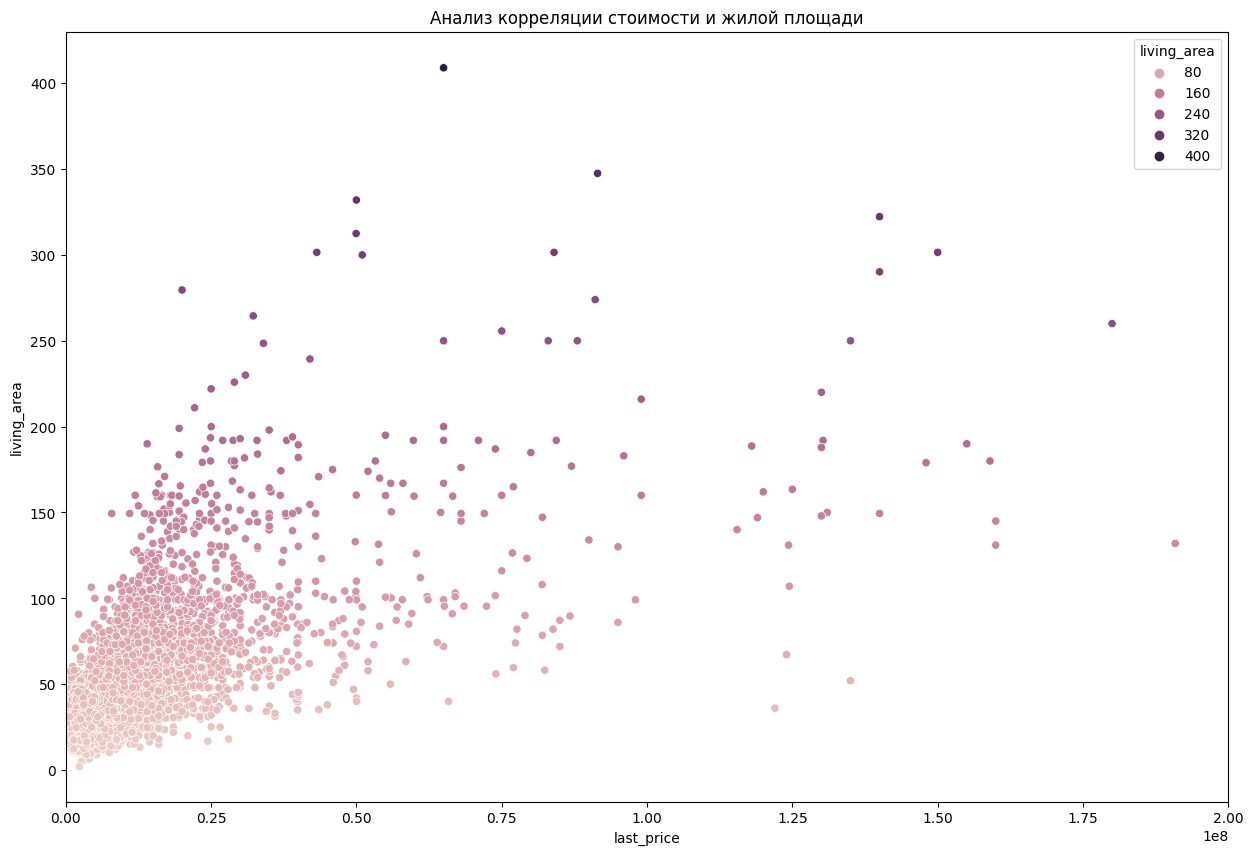

In [119]:
plt.figure(figsize=(15, 10))
plt.xlim(0, 200000000) 
plt.title('Анализ корреляции стоимости и жилой площади')
sns.scatterplot(data=df, x="last_price", y="living_area", hue="living_area");

**Наблюдения:**


Здесь связь уже слабее.

Зависимость от **Типа этажа**

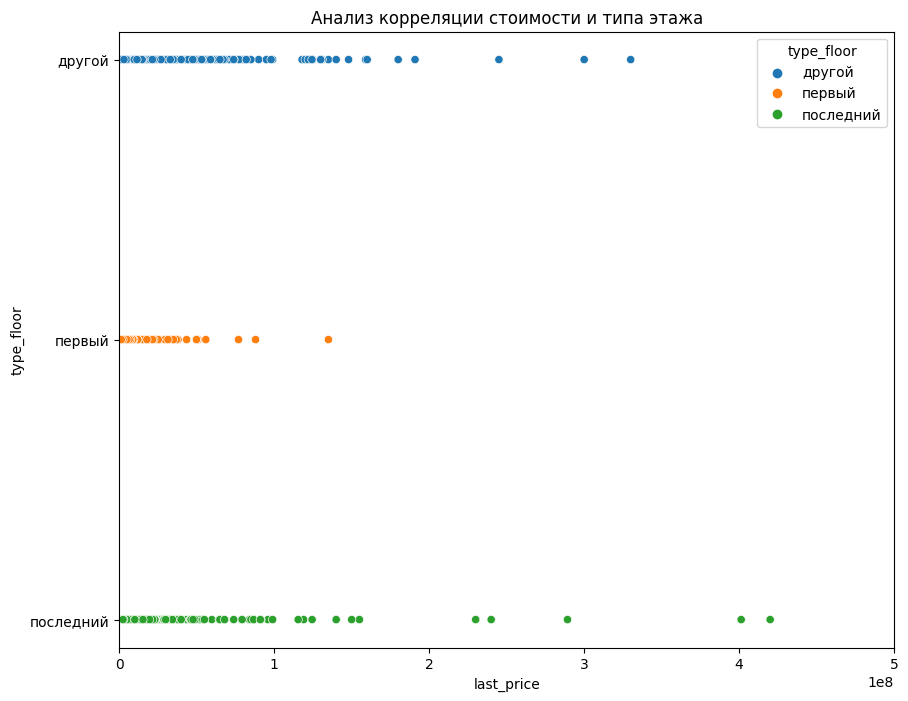

In [120]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 500000000) 
plt.title('Анализ корреляции стоимости и типа этажа')
sns.scatterplot(data=df, x="last_price", y="type_floor", hue="type_floor");

Здесь можно увидеть, что максимальная цена для объектов на первом этаже на порядок ниже максимальной цены для объектов на других этажах, в том числе и на последнем. 


Зависимость от **Количества комнат**

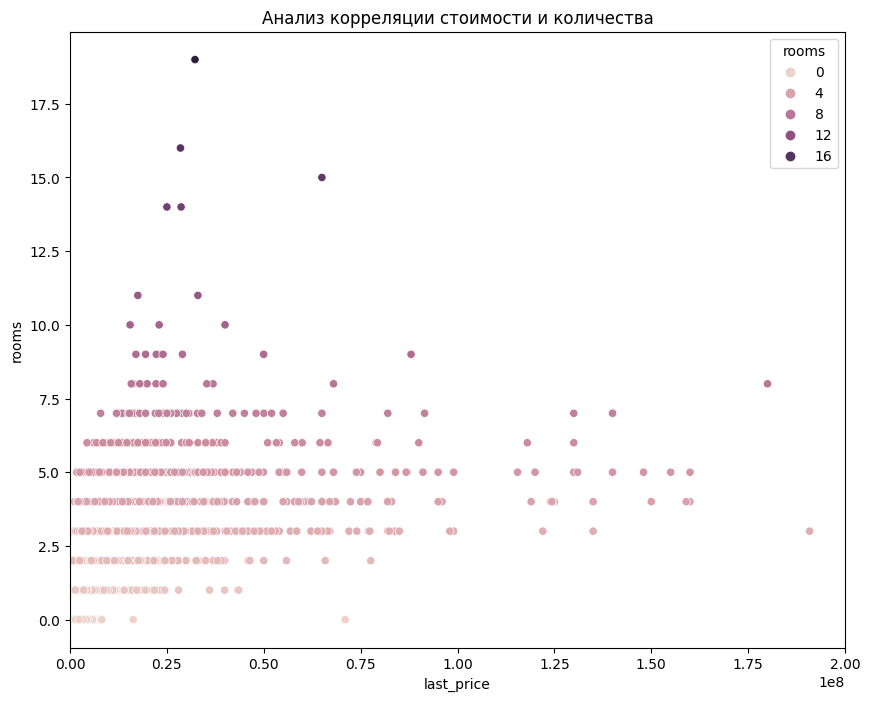

In [121]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 200000000) 
plt.title('Анализ корреляции стоимости и количества')
sns.scatterplot(data=df, x="last_price", y="rooms", hue="rooms");

**Наблюдения:**


Четкой линейной связи не прослеживается. Однако от 0 до 3-х комнат есть тенденция к росту цены.

Зависимость от **Этажа**

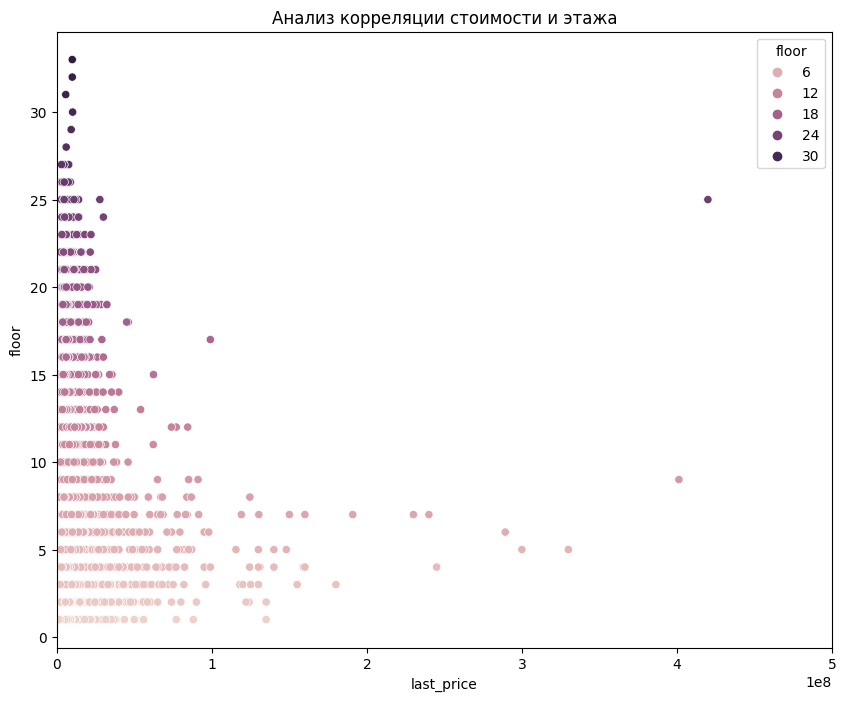

In [122]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 500000000) 
plt.title('Анализ корреляции стоимости и этажа')
sns.scatterplot(data=df, x="last_price", y="floor", hue="floor");

**Наблюдения:**


Связь имеется, но только в распределении: это связано с тем, что у нас в данных больше объектов с первого по девятый этажи.

Зависимость от **Даты размещения объявления**

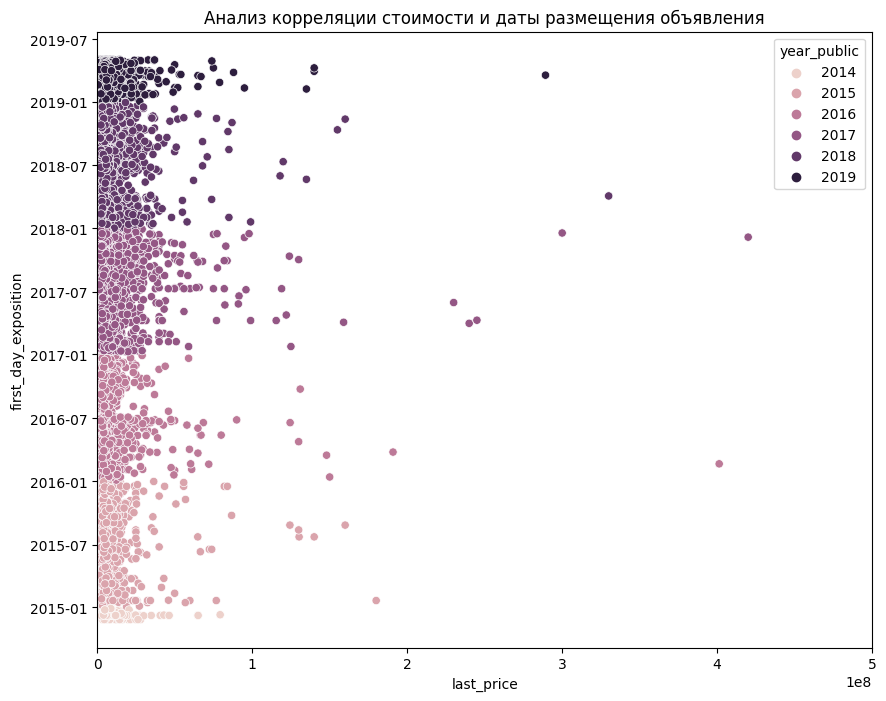

In [123]:
plt.figure(figsize=(10, 8))
plt.xlim(0, 500000000) 
plt.title('Анализ корреляции стоимости и даты размещения объявления')
sns.scatterplot(data=df, x="last_price", y="first_day_exposition", hue="year_public");

**Наблюдения:**


Связь даты публикации с ценой объекта не наблюдается.

#### Cчитаем среднюю цену 1 кв.м в ТОП-10 населенных пунктов по количеству объявлений. 

Посчитаем стоимость согласно условию задания.

In [124]:
top = (df.pivot_table(index='locality_name', values='price_per_square', aggfunc=['count','mean'])
       .sort_values(by=('count','price_per_square'), ascending=False).head(10))
top

,count,mean
,price_per_square,price_per_square
locality_name,,
Санкт-Петербург,15491,114693.583425
Мурино,564,85731.159154
Кудрово,463,95223.475020
посёлок Шушары,434,78411.075319
Всеволожск,391,68642.981870
Пушкин,366,103231.357894
Колпино,337,75480.547446
посёлок Парголово,320,90023.800087


Самая высокая средняя цена за квадратный метр в **г. Санкт-Петербург**: 114650 рублей
    

Самая низкая средняя цена за квадратный метр в **г. Выборг**: 58019 рублей

#### Посчитаем среднюю стоимость километра в показателе ```km_city_centers_nearest``` для г. Санкт-Петербург. Опишем, как стоимость зависит от расстояния до центра.

In [125]:
# отобрали только город Санкт-Петербург
saint_p = df.query('locality_name == "Санкт-Петербург"')

In [126]:
# Создали столбец с ценой одного километра за квадратный метр
saint_p.loc[:, 'price_of_km_center'] = saint_p['price_per_square'] / (saint_p['city_centers_nearest'] / 1000)

/tmp/ipykernel_13071/1022665926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saint_p.loc[:, 'price_of_km_center'] = saint_p['price_per_square'] / (saint_p['city_centers_nearest'] / 1000)


In [127]:
# убрали NaN-значения из расчета
saint_p = saint_p.query('price_of_km_center == price_of_km_center')

In [128]:
# рассчитали среднюю цену за один километр
saint_p.pivot_table(index='locality_name', values='price_of_km_center')

,price_of_km_center
locality_name,
Санкт-Петербург,16868.615812


Средняя цена одного километра до центра в г. Санкт-Петербурге равна 16943 рубля за квадратный метр.

Посмотрим, как расстояние до центра влияет на стоимость квартиры.

In [129]:
saint_p.loc[:, ['last_price','city_centers_nearest']].corr()

,last_price,city_centers_nearest
last_price,1.000000,-0.257559
city_centers_nearest,-0.257559,1.000000


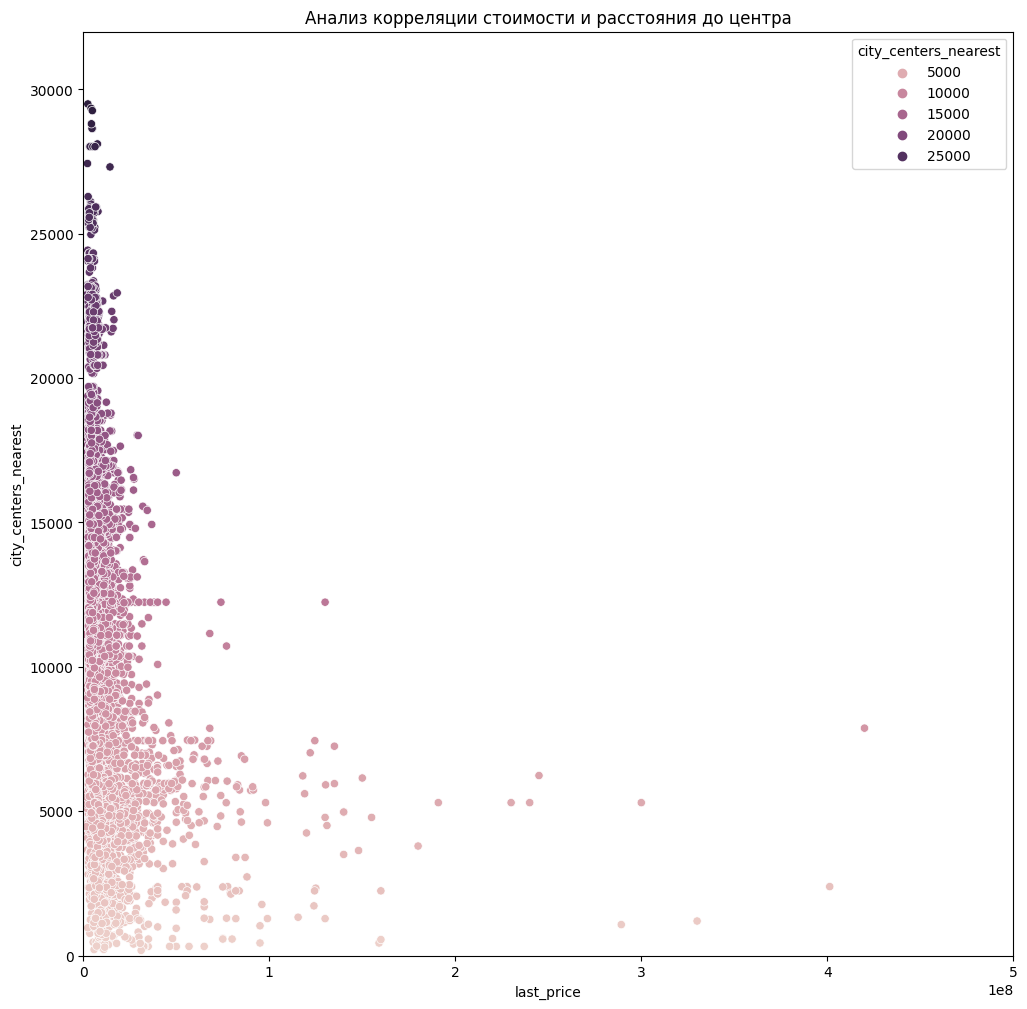

In [130]:
plt.figure(figsize=(12, 12))
plt.xlim(0, 500000000) 
plt.ylim(0, 32000)
plt.title('Анализ корреляции стоимости и расстояния до центра')
sns.scatterplot(data=saint_p, x="last_price", y="city_centers_nearest", hue="city_centers_nearest");

Зависимость есть, но не линейная: от 10 км и более расстояние до центра города особо не влияет на стоимость. Некоторая зависимость появляется ближе 10 км к центру, но не сильная, в основном цена держится на одном уровне.

Как будто есть условный порог: в пределах 8 - 10 км от центра цена завышена.

**Промежуточный вывод**

В этом шаге мы изучили основные параметры объектов, построив по ним гистограммы. Из основных наблюдений в этом шаге:

* самые распространенные значение общей площади составляют 45 кв.м.
* В районе 4,5 млн рублей самая распространенная цена для объектов.
* Чаще всего в объявлениях встречаются однокомнатные и двухкомнатные квартиры.
* Высота потолков в 2,5 м преобладает, но при этом много объекстов с высотой потолка 3 м.
* Больше всего в объявлениях объектов расположенных с первого по пятый этажи. При этом продающихся объектов на первом и последнем этажах намного меньше, чем на некрайних этажах.
* В данных преобладают пятиэтажные и девятиэтажные объекты.
* Такие показатели, как расстояние до аэропорта и расстояние до ближайшего парка, имеют пиковые показатели, это связано с преобладанием конкретного города в размещенных объявлениях.
* В выходные дни размещенных публикаций заметно ниже, в основном пользователи выкладывают объявления в течение рабочей недели.
* В течение года пик публикации объявлений приходится на период с февраля по апрель, далее небольшое затишье и плавный рост до ноября месяца включительно. Затишье на декабрь и январь.

Также мы определили среднее время публикации на сайте - 182 дня, и медиану - 97 дней.

Среди факторов, влияющих на стоимость объекта, по нашим исследованиям можно выделить общую площадь и жилую площадь объекта. Также обратили внимание, что максимальная стоимость объектов на первом этаже ниже, чем максимальная стоимость объектов на других этажах.

Определили ТОП-10 популярных городов, посчитали для этого рейтинга, что самая высокая средняя стоимость квадратного метра в Санкт-Петербурге, а самая низкая в Выборге.

Проанализировали, как расстояние до центра в Санкт-Петербурге влияет на стоимость квартиры: оказалось, что цена меняется в большую сторону для объектов ближе чем 10 км до центра.


### Общий вывод

- В начале исследования мы предобработали данные, изменив некоторые названия столбцов, обработали пропуски, сделали подходящий тип данных во всех ячейках, где удалось избавиться от пропусков. В столбце locality_name удалили неявные дубликаты, вычислили и удалили аномальные значения. 

-----

- По ходу выполнения работы мы оставляли комментарии к каждому шагу с рекомендациями, как в дальнейшем избежать пропусков и аномалий при сборе данных.
    
----

    Приведем комментарии здесь:
 - При выборе населенного пункта необходимо доработать выпадающий список населенных пунктов, чтобы пользователи выбирали населенный пункт из предоставленных сайтом;
 - Сделать обязательным поле "Сколько всего этажей в доме?"
 - При выборе высоты потолка необходимо доработать выпадающий список высоты, чтобы пользователи выбирали вариант из предоставленных сайтом;
 - Значительно доработать автоматический сбор информации по расстояниям до центра, аэропорта, парков и прудов;
 - Сделать доступной информацию о статусе публикации объявления на момент выгрузки (опубликовано/снято).
 
----

- Нами были посчитаны и добавлены в таблицу дополнительные значения.
    
----

- В исследовательской части нашей работы мы оценили основные парметры наших объектов, визуализировали их и         описали наблюдения. Также определили среднее время публикации объявления и медиану, выделили факторы влияния на стоимость объектов: общая площадь и жилая площадь.
    
----

- В ТОП-10 городов по количеству объвлений попали Санкт-Петербург, Мурино, Кудрово, посёлок Шушары,               Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина, Выборг. Самые дорогие объекты из этого рейтинга в Санкт-Петербурге.
    
----

- Обнаружили, что в Санкт-Петербурге есть тенденция к увеличению цены за квадратный метр при приближении            к центру города ближе, чем 10 км.
    